In [299]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import re
import string
import unicodedata
import plotly_express as px
import plotly.io as pio
from sklearn import preprocessing
import pandas_profiling
import datetime
%matplotlib inline
import matplotlib.style
import matplotlib as mpl
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")


In [122]:
pwd

'/Users/joaocamargo/macHD/GITHUB/TCC-PUCRS-2020'

In [123]:
ls -ltr Data/

total 9424
-rw-r--r--  1 joaocamargo  staff  3301959 Apr 21 10:13 count_day_type.csv
-rw-r--r--  1 joaocamargo  staff   124920 Apr 21 10:13 count_day.csv
-rw-r--r--  1 joaocamargo  staff    24972 Apr 21 10:13 count_week_day_type.csv
-rw-r--r--  1 joaocamargo  staff      138 Apr 21 10:13 count_week_day.csv
-rw-r--r--  1 joaocamargo  staff   386439 Apr 21 10:13 count_year_month_type.csv
-rw-r--r--  1 joaocamargo  staff     4827 Apr 21 10:13 count_year_month.csv


In [124]:
df_count_day_type = pd.read_csv('./Data/count_day_type.csv',sep=",",encoding='ascii')
df_count_week_day_type = pd.read_csv('Data/count_week_day_type.csv',sep=",",encoding='ascii')
df_count_year_month_type = pd.read_csv('Data/count_year_month_type.csv',sep=",",encoding='ascii')

#df_count_day = pd.read_csv('TCC_DATA/count_day.csv',sep=",",encoding='ascii')
#df_count_week_day = pd.read_csv('TCC_DATA/count_week_day.csv',sep=",",encoding='ascii')
#df_count_year_month = pd.read_csv('TCC_DATA/count_year_month.csv',sep=",",encoding='ascii')

del df_count_day_type['Unnamed: 0']
#del df_count_day['Unnamed: 0']
del df_count_week_day_type['Unnamed: 0']
#del df_count_week_day['Unnamed: 0']
del df_count_year_month_type['Unnamed: 0']
#del df_count_year_month['Unnamed: 0']

In [125]:
#dataFrames = [df_count_day_type,df_count_day,df_count_week_day_type,df_count_week_day,df_count_year_month_type,df_count_year_month]
dataFrames = [df_count_day_type,df_count_week_day_type,df_count_year_month_type]
for df in dataFrames:
    display(df.head(1))

judgmentDate                   type  count
0   2000-01-03  Agravo de Instrumento      2

weekDay                                     type  count
0     Sun  A\xc3\xa7\xc3\xa3o Civil P\xc3\xbablica      2

yearMonth                   type  count
0  2000-01-01  Agravo de Instrumento     12

In [126]:
for df in dataFrames:    
    print(df.columns)

Index(['judgmentDate', 'type', 'count'], dtype='object')
Index(['weekDay', 'type', 'count'], dtype='object')
Index(['yearMonth', 'type', 'count'], dtype='object')


In [127]:
#verificar feriados 
def isHoliday(dia,mes):
    if dia == 1:
        if mes == 1 or mes ==5:
            return(True)
    if (dia ==2 or dia==15) and mes==11:
        return(True)
    if (dia ==7 or dia==20) and mes == 9:
        return(True)
    if mes == 4 and (dia ==10 or dia ==12 or dia==21):
        return(True)
    if dia ==24 and mes == 6:
        return(True)
    if mes==10 and (dia==12 or dia==28):
        return(True)
    if mes==12 and dia ==25:
        return(True)
    return(False)   

In [128]:
#transformar data 
# adiciona coluna de dia da semana  (segunda=0,terça=1,quarta=2,quinta=3, sexta=4,sabado=5,domingo=6)
for df in [df_count_day_type]:
    if df['judgmentDate'].dtype != 'datetime64[ns]':
        character = df['judgmentDate'].str.replace('\d+','')[2][1]
        formato=''
        print('formato: ',df['judgmentDate'].str.find(character)[0])
        if df['judgmentDate'].str.find(character)[0] ==4:
            formato = '%Y{0}%m{0}%d'
        else:
            formato = '%d{0}%m{0}%Y'
        print(character)
    df['judgmentDate'] = pd.to_datetime(df['judgmentDate'],format=formato.format(character))
    df['weekDay'] = df['judgmentDate'].apply(lambda x: x.weekday())
    df['weekType'] = df['judgmentDate'].apply(lambda x: 'DiaSemana' if x.weekday()<5 else 'FimSemana')
    df['Dia'] = df['judgmentDate'].apply(lambda x: x.day)   
    df['Mes'] = df['judgmentDate'].apply(lambda x: x.month)  
    df['Ano'] = df['judgmentDate'].apply(lambda x: x.year)  
    df['Feriado'] = df['judgmentDate'].apply(lambda x: isHoliday(x.day,x.month))  

formato:  4
-


In [129]:
def elementdecode(x):
    #if the first condition if not met, the second is not evaluated
    if (type(x) == str):        
        bb=x.encode()
        cc = bb.decode('unicode-escape').encode('ISO-8859-1')                
        return(cc.decode('utf-8'))
    else:                
        return x.decode('utf-8')

In [130]:
df_count_day_type['type'] = df_count_day_type['type'].apply(lambda x: elementdecode(x))
df_count_week_day_type['type'] = df_count_week_day_type['type'].apply(lambda x: elementdecode(x))
df_count_year_month_type['type'] = df_count_year_month_type['type'].apply(lambda x: elementdecode(x))

In [131]:
for df in dataFrames:
    display(df.head(1))

judgmentDate                   type  count  weekDay   weekType  Dia  Mes  \
0   2000-01-03  Agravo de Instrumento      2        0  DiaSemana    3    1   

    Ano  Feriado  
0  2000    False

weekDay                type  count
0     Sun  Ação Civil Pública      2

yearMonth                   type  count
0  2000-01-01  Agravo de Instrumento     12

In [132]:
#display(df_count_day_type.groupby(['type','judgmentDate']).count().reset_index().sort_values(by='count',ascending=False))

#df_count_day_type["CountNorm"] = df_count_day_type["count"] / df_count_day_type["count"].max()
#df_count_day_type.head(3)

In [133]:
print('Contagem por dia comportamento')
tempdf = df_count_day_type

#definir data
tempdf = df_count_day_type[(df_count_day_type['judgmentDate'] > '2010-01-01') 
                           & (df_count_day_type['judgmentDate'] < '2011-12-31')]

#definir dia de semana ou fim de semana
#tempdf = tempdf[tempdf['weekType']=='DiaSemana']

#definir feriado 
tempdf = tempdf[tempdf['Feriado']==True]

scatter_plot = px.line(tempdf[['judgmentDate','count']], x="judgmentDate", y="count")
pio.show(scatter_plot)

Contagem por dia comportamento


In [134]:
#df_count_day_type[['judgmentDate','type','weekType','weekDay','count','Feriado','Dia','Mes','Ano']].profile_report();


In [135]:
print(df_count_day_type.columns)
df_count_day_type_top20 = df_count_day_type[['type','count']].groupby('type').aggregate({"count":"sum"}).reset_index().sort_values(by='count',ascending=False)
df_count_day_type_top20 = df_count_day_type_top20.head(20)
display(df_count_day_type_top20.head(5))

scatter_plot_top20 = px.bar(df_count_day_type_top20, x="type", y="count")
pio.show(scatter_plot_top20)

Index(['judgmentDate', 'type', 'count', 'weekDay', 'weekType', 'Dia', 'Mes',
       'Ano', 'Feriado'],
      dtype='object')


type    count
12          Apelação Cível  1619859
6    Agravo de Instrumento  1367460
39  Embargos de Declaração   813282
97           Recurso Cível   470179
0                   Agravo   420130

In [136]:
print(df_count_day_type.columns)
df_count_day_type_top20_year = df_count_day_type[['type','count','Ano']].groupby(['type','Ano']).aggregate({"count":"sum"}).reset_index().sort_values(by='count',ascending=False)
df_count_day_type_top20_year = df_count_day_type_top20_year.head(60)
display(df_count_day_type_top20_year.head(5))

scatter_plot_top20_year = px.bar(df_count_day_type_top20_year, x="Ano", y="count",color='type')
pio.show(scatter_plot_top20_year)

############

print(df_count_day_type.columns)
df_count_day_type_top20_year = df_count_day_type[['type','count','Mes']].groupby(['type','Mes']).aggregate({"count":"sum"}).reset_index().sort_values(by='count',ascending=False)
df_count_day_type_top20_year = df_count_day_type_top20_year.head(100)
display(df_count_day_type_top20_year.head(5))

scatter_plot_top20_year = px.bar(df_count_day_type_top20_year, x="Mes", y="count",color='type')
pio.show(scatter_plot_top20_year)

############

print(df_count_day_type.columns)
df_count_day_type_top20_year = df_count_day_type[['type','count','Feriado']].groupby(['type','Feriado']).aggregate({"count":"sum"}).reset_index().sort_values(by='count',ascending=False)
df_count_day_type_top20_year = df_count_day_type_top20_year.head(60)
#display(df_count_day_type_top20_year.head(5))
scatter_plot_top20_year = px.bar(df_count_day_type_top20_year, x="type", y="count",color='Feriado')
pio.show(scatter_plot_top20_year)

############

print(df_count_day_type.columns)
df_count_day_type_top20_year = df_count_day_type[['type','count','weekDay']].groupby(['type','weekDay']).aggregate({"count":"sum"}).reset_index().sort_values(by='count',ascending=False)
df_count_day_type_top20_year = df_count_day_type_top20_year.head(100)
display(df_count_day_type_top20_year.head(5))

%config InlineBackend.figure_format ='retina'
scatter_plot_top20_year = px.bar(df_count_day_type_top20_year, x="weekDay", y="count",color='type')
pio.show(scatter_plot_top20_year)


Index(['judgmentDate', 'type', 'count', 'weekDay', 'weekType', 'Dia', 'Mes',
       'Ano', 'Feriado'],
      dtype='object')


type   Ano   count
85   Agravo de Instrumento  2009  126510
86   Agravo de Instrumento  2010  122751
87   Agravo de Instrumento  2011  121807
142         Apelação Cível  2010  121789
140         Apelação Cível  2008  117294

Index(['judgmentDate', 'type', 'count', 'weekDay', 'weekType', 'Dia', 'Mes',
       'Ano', 'Feriado'],
      dtype='object')


type  Mes   count
116  Apelação Cível    8  164322
113  Apelação Cível    5  156594
111  Apelação Cível    3  153918
118  Apelação Cível   10  153758
119  Apelação Cível   11  152545

Index(['judgmentDate', 'type', 'count', 'weekDay', 'weekType', 'Dia', 'Mes',
       'Ano', 'Feriado'],
      dtype='object')


Index(['judgmentDate', 'type', 'count', 'weekDay', 'weekType', 'Dia', 'Mes',
       'Ano', 'Feriado'],
      dtype='object')


type  weekDay   count
62           Apelação Cível        2  592958
63           Apelação Cível        3  578755
35    Agravo de Instrumento        2  386104
36    Agravo de Instrumento        3  335245
177  Embargos de Declaração        3  312724

In [142]:
df_count_day_date_index = df_count_day_type
display(df_count_day_date_index.head(1))
df_count_day_date_index.transpose()

plot_df_count_day_date_index = px.line(df_count_day_date_index.reset_index(), x="judgmentDate", y="count",color='type',width=5000, height=500)
pio.show(plot_df_count_day_date_index)

judgmentDate                   type  count  weekDay   weekType  Dia  Mes  \
0   2000-01-03  Agravo de Instrumento      2        0  DiaSemana    3    1   

    Ano  Feriado  
0  2000    False

In [144]:
df_count_YM_index = df_count_year_month_type

plot_df_count_day_date_index = px.line(df_count_YM_index.reset_index(), x="yearMonth", y="count",color='type',width=5000, height=500)
pio.show(plot_df_count_day_date_index)

In [148]:
df_count_day_month_type_teeste = df_count_day_type
df_count_day_month_type_teeste = df_count_day_month_type_teeste.reset_index()
del df_count_day_month_type_teeste['index']

In [149]:
df_count_day_month_type_teeste.set_index('judgmentDate', inplace=True)
print(df_count_day_month_type_teeste.index)

DatetimeIndex(['2000-01-03', '2000-01-06', '2000-01-10', '2000-01-11',
               '2000-01-20', '2000-01-24', '2000-02-02', '2000-02-06',
               '2000-02-07', '2000-02-08',
               ...
               '2017-12-21', '2017-12-21', '2017-12-27', '2017-12-28',
               '2017-12-28', '2017-12-28', '2017-12-29', '2017-12-29',
               '2017-12-29', '2017-12-29'],
              dtype='datetime64[ns]', name='judgmentDate', length=63765, freq=None)


In [150]:
display(df_count_day_month_type_teeste.head(3))
display(df_count_day_month_type_teeste.tail(3))

type  count  weekDay   weekType  Dia  Mes  \
judgmentDate                                                               
2000-01-03    Agravo de Instrumento      2        0  DiaSemana    3    1   
2000-01-06    Agravo de Instrumento      1        3  DiaSemana    6    1   
2000-01-10    Agravo de Instrumento      2        0  DiaSemana   10    1   

               Ano  Feriado  
judgmentDate                 
2000-01-03    2000    False  
2000-01-06    2000    False  
2000-01-10    2000    False

type  count  weekDay   weekType  Dia  Mes  \
judgmentDate                                                                
2017-12-29     Agravo de Instrumento     29        4  DiaSemana   29   12   
2017-12-29            Apelação Cível      3        4  DiaSemana   29   12   
2017-12-29    Embargos de Declaração      8        4  DiaSemana   29   12   

               Ano  Feriado  
judgmentDate                 
2017-12-29    2017    False  
2017-12-29    2017    False  
2017-12-29    2017    False

judgmentDate      count
0   2000-12-31  23.426102
1   2001-12-31  28.331988
2   2002-12-31  34.729339

judgmentDate  count
0   2000-12-31  27104
1   2001-12-31  49156
2   2002-12-31  67236

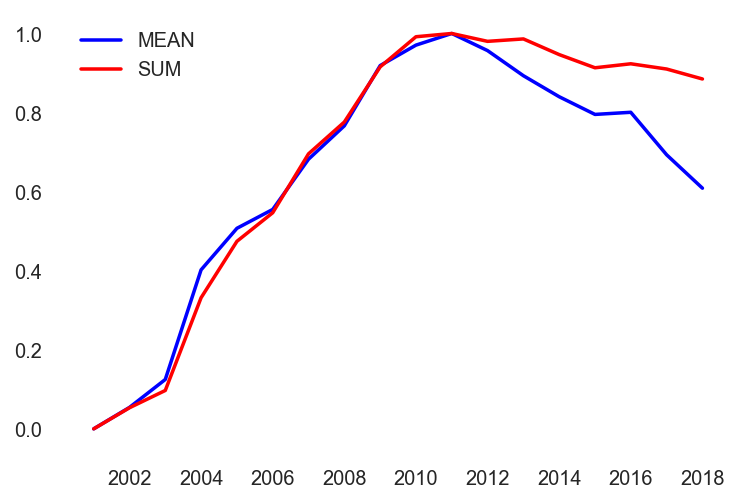

In [198]:
#df.plot.hist()     histogram
#df.plot.bar()      bar chart
#df.plot.barh()     horizontal bar chart
#df.plot.line()     line chart
#df.plot.area()     area chart
#df.plot.scatter()  scatter plot
#df.plot.box()      box plot
#df.plot.kde()      kde plot
#df.plot.hexbin()   hexagonal bin plot
#df.plot.pie()      pie chart

#df_count_day_month_type_teeste = df_count_day_type.transpose()

#display(df_count_day_month_type_teeste[['count']].resample('Y').sum().head(3))
#display(df_count_day_month_type_teeste[['count']].resample('Y').mean().head(3))



#fig, (ax1,ax2) = plt.subplots(2,1, figsize=(15,10), constrained_layout=True)
#plt.plot(df_count_day_month_type_teeste[['count']].resample('Y').mean(),label='MEDIA COUNT')
#plt.plot(df_count_day_month_type_teeste[['count']].resample('Y').sum(),label='SOMA COUNT')

dfMeean = df_count_day_month_type_teeste[['count']].resample('Y').mean().reset_index()
dfSuum = df_count_day_month_type_teeste[['count']].resample('Y').sum().reset_index()

display(dfMeean.head(3))
display(dfSuum.head(3))

dfMeanSum = pd.merge(dfMeean,dfSuum,on='judgmentDate')

dfMeanSum.index = dfMeanSum['judgmentDate']
del dfMeanSum['judgmentDate']

dfMeanSumNorm=(dfMeanSum-dfMeanSum.min())/(dfMeanSum.max()-dfMeanSum.min())
#display(dfMeanSumNorm.head(3))
dfMeanSumNorm = dfMeanSumNorm.reset_index()
#display(dfMeanSumNorm.head(3))

plt.plot(dfMeanSumNorm['judgmentDate'], dfMeanSumNorm['count_x'],'b-',  label='MEAN')
plt.plot(dfMeanSumNorm['judgmentDate'], dfMeanSumNorm['count_y'],'r-',  label='SUM')

plt.legend(loc='best')
plt.show()



<div class="alert alert-info"><h1> Análise de Tendência
</h1>
    <hr/>
</div>



# SatsModels

In [199]:
from statsmodels.tsa.filters.hp_filter import hpfilter

In [200]:
#atribuindo Valores Novos Independentes

df_t_day = df_count_day_type 
df_t_week = df_count_week_day_type 
df_t_YM = df_count_year_month_type 

display(df_t_day.head(2))
display(df_t_YM.head(2))


judgmentDate                   type  count  weekDay   weekType  Dia  Mes  \
0   2000-01-03  Agravo de Instrumento      2        0  DiaSemana    3    1   
1   2000-01-06  Agravo de Instrumento      1        3  DiaSemana    6    1   

    Ano  Feriado  
0  2000    False  
1  2000    False

yearMonth                   type  count
0  2000-01-01  Agravo de Instrumento     12
1  2000-02-01        Ação Rescisória      1

In [201]:
#Transoforma o indice em DATETIME

df_t_day.index = pd.to_datetime(df_t_day['judgmentDate'])
df_t_YM.index = pd.to_datetime(df_t_YM['yearMonth'])
#display(df_t_day.head(1))
#display(df_t_YM.head(1))

del df_t_day['judgmentDate']
del df_t_YM['yearMonth']

display(df_t_day.head(1))
display(df_t_YM.head(1))

#print(df_t_week['weekDay'].count())
#print(df_t_YM['yearMonth'].count())
#display(df_t_week.head(3))
#print(df_t_day.index)
#print(df_t_week.index)
#print(df_t_YM.index)

type  count  weekDay   weekType  Dia  Mes  \
judgmentDate                                                               
2000-01-03    Agravo de Instrumento      2        0  DiaSemana    3    1   

               Ano  Feriado  
judgmentDate                 
2000-01-03    2000    False

type  count
yearMonth                               
2000-01-01  Agravo de Instrumento     12

### Somar todas 

In [202]:
#Agrupa todas as informações 
print('Antes do agrupamento: ',df_t_day['count'].count())
df_t_day = df_t_day.groupby('judgmentDate').agg({'count':'sum'})
df_t_YM = df_t_YM.groupby('yearMonth').agg({'count':'sum'})
print('Depois do agrupamento: ',df_t_day.count())

Antes do agrupamento:  63765
Depois do agrupamento:  count    5790
dtype: int64


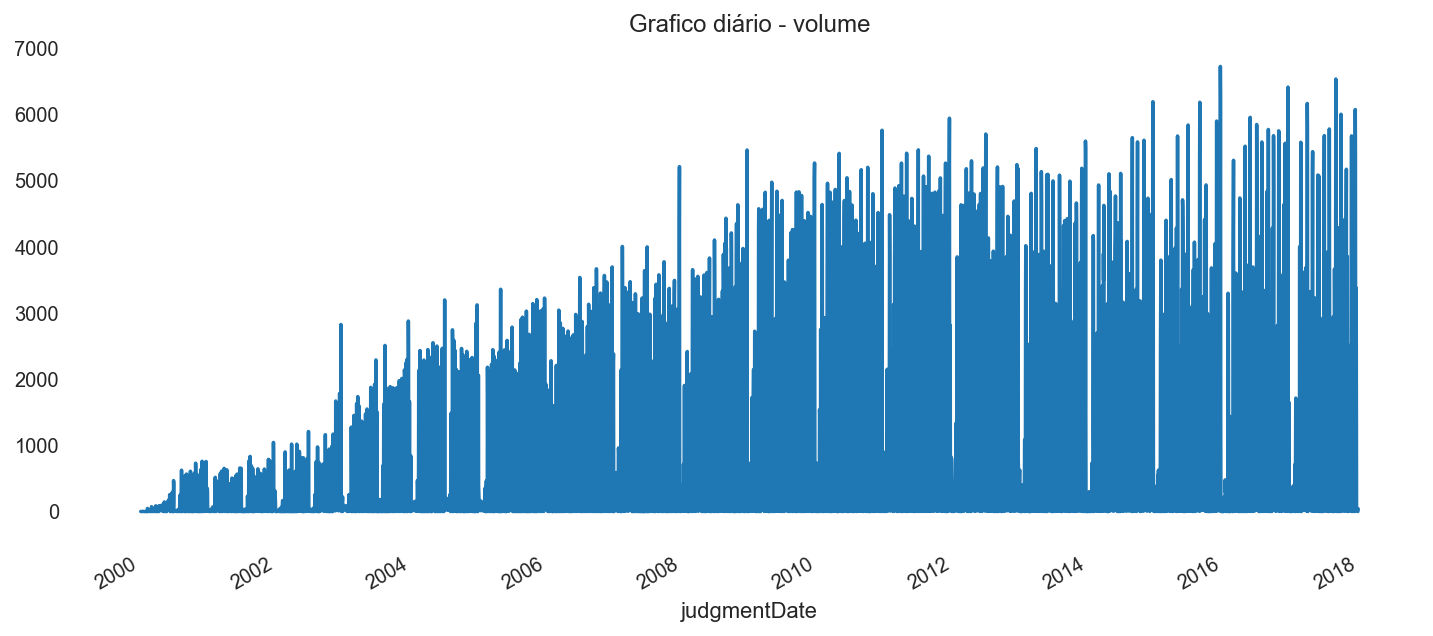

In [203]:
df_t_day['count'].plot.line(figsize=(12,5),title='Grafico diário - volume')

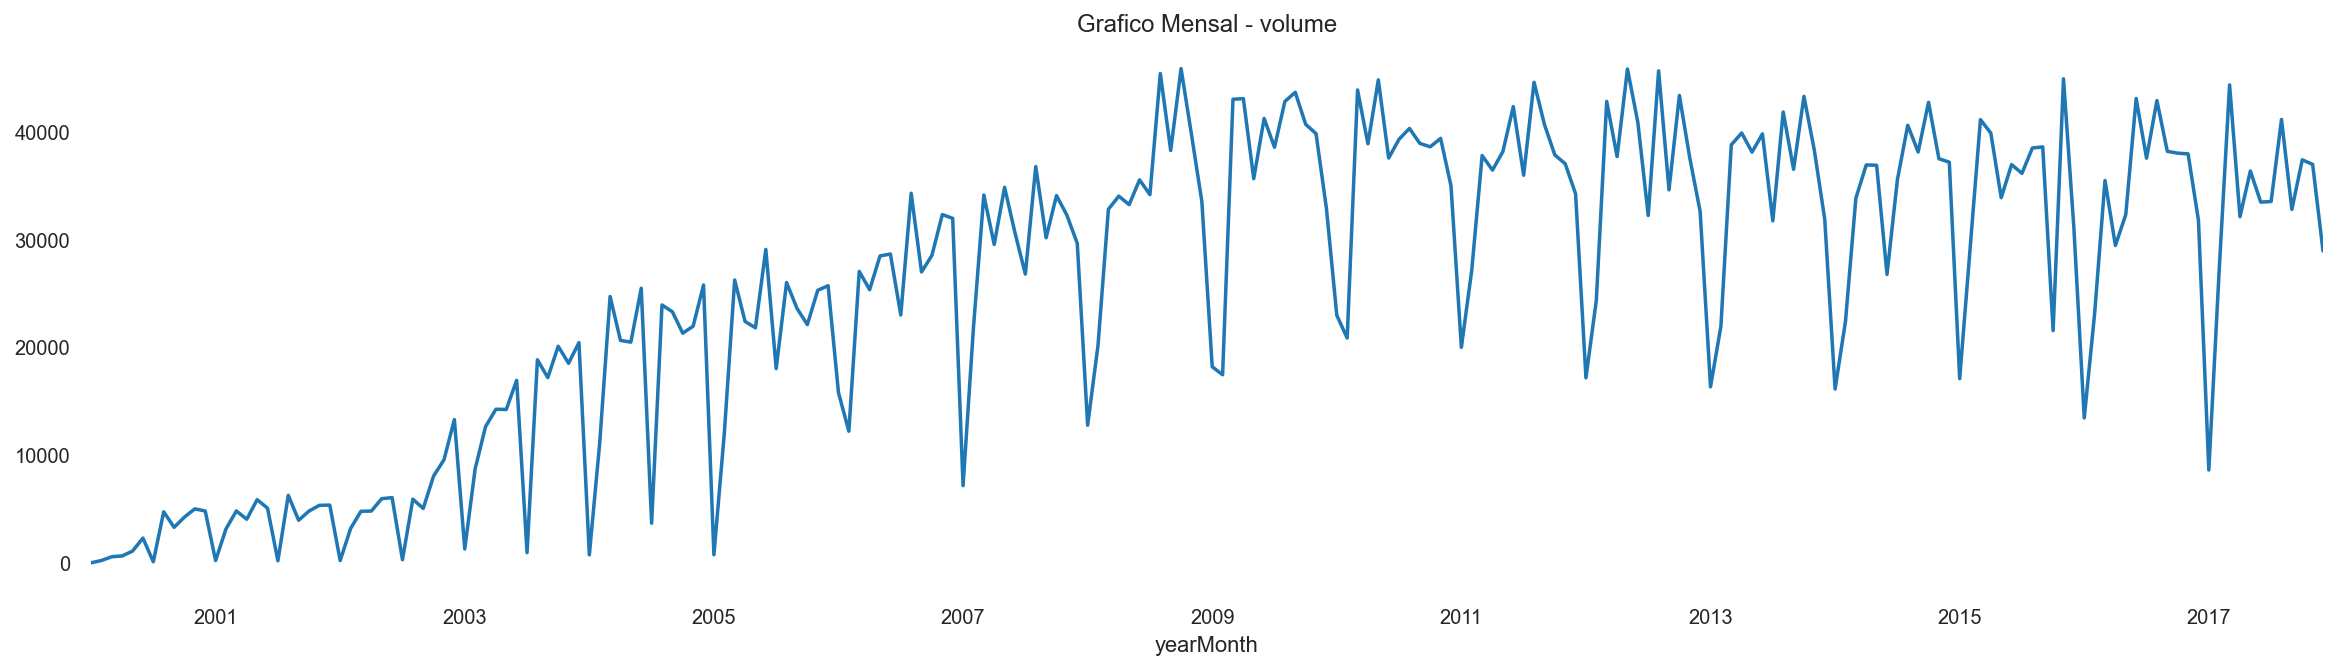

In [204]:
df_t_YM['count'].plot.line(figsize=(20,5),title='Grafico Mensal - volume')

In [205]:
from statsmodels.tsa.filters.hp_filter import hpfilter
#Verificar Tendencia
year_cycle,year_trend = hpfilter(df_t_YM['count'],lamb=1600)
day_cycle,day_trend = hpfilter(df_t_day['count'],lamb=1600)

In [206]:
df_t_day['trend'] = day_trend
df_t_YM['trend'] = year_trend

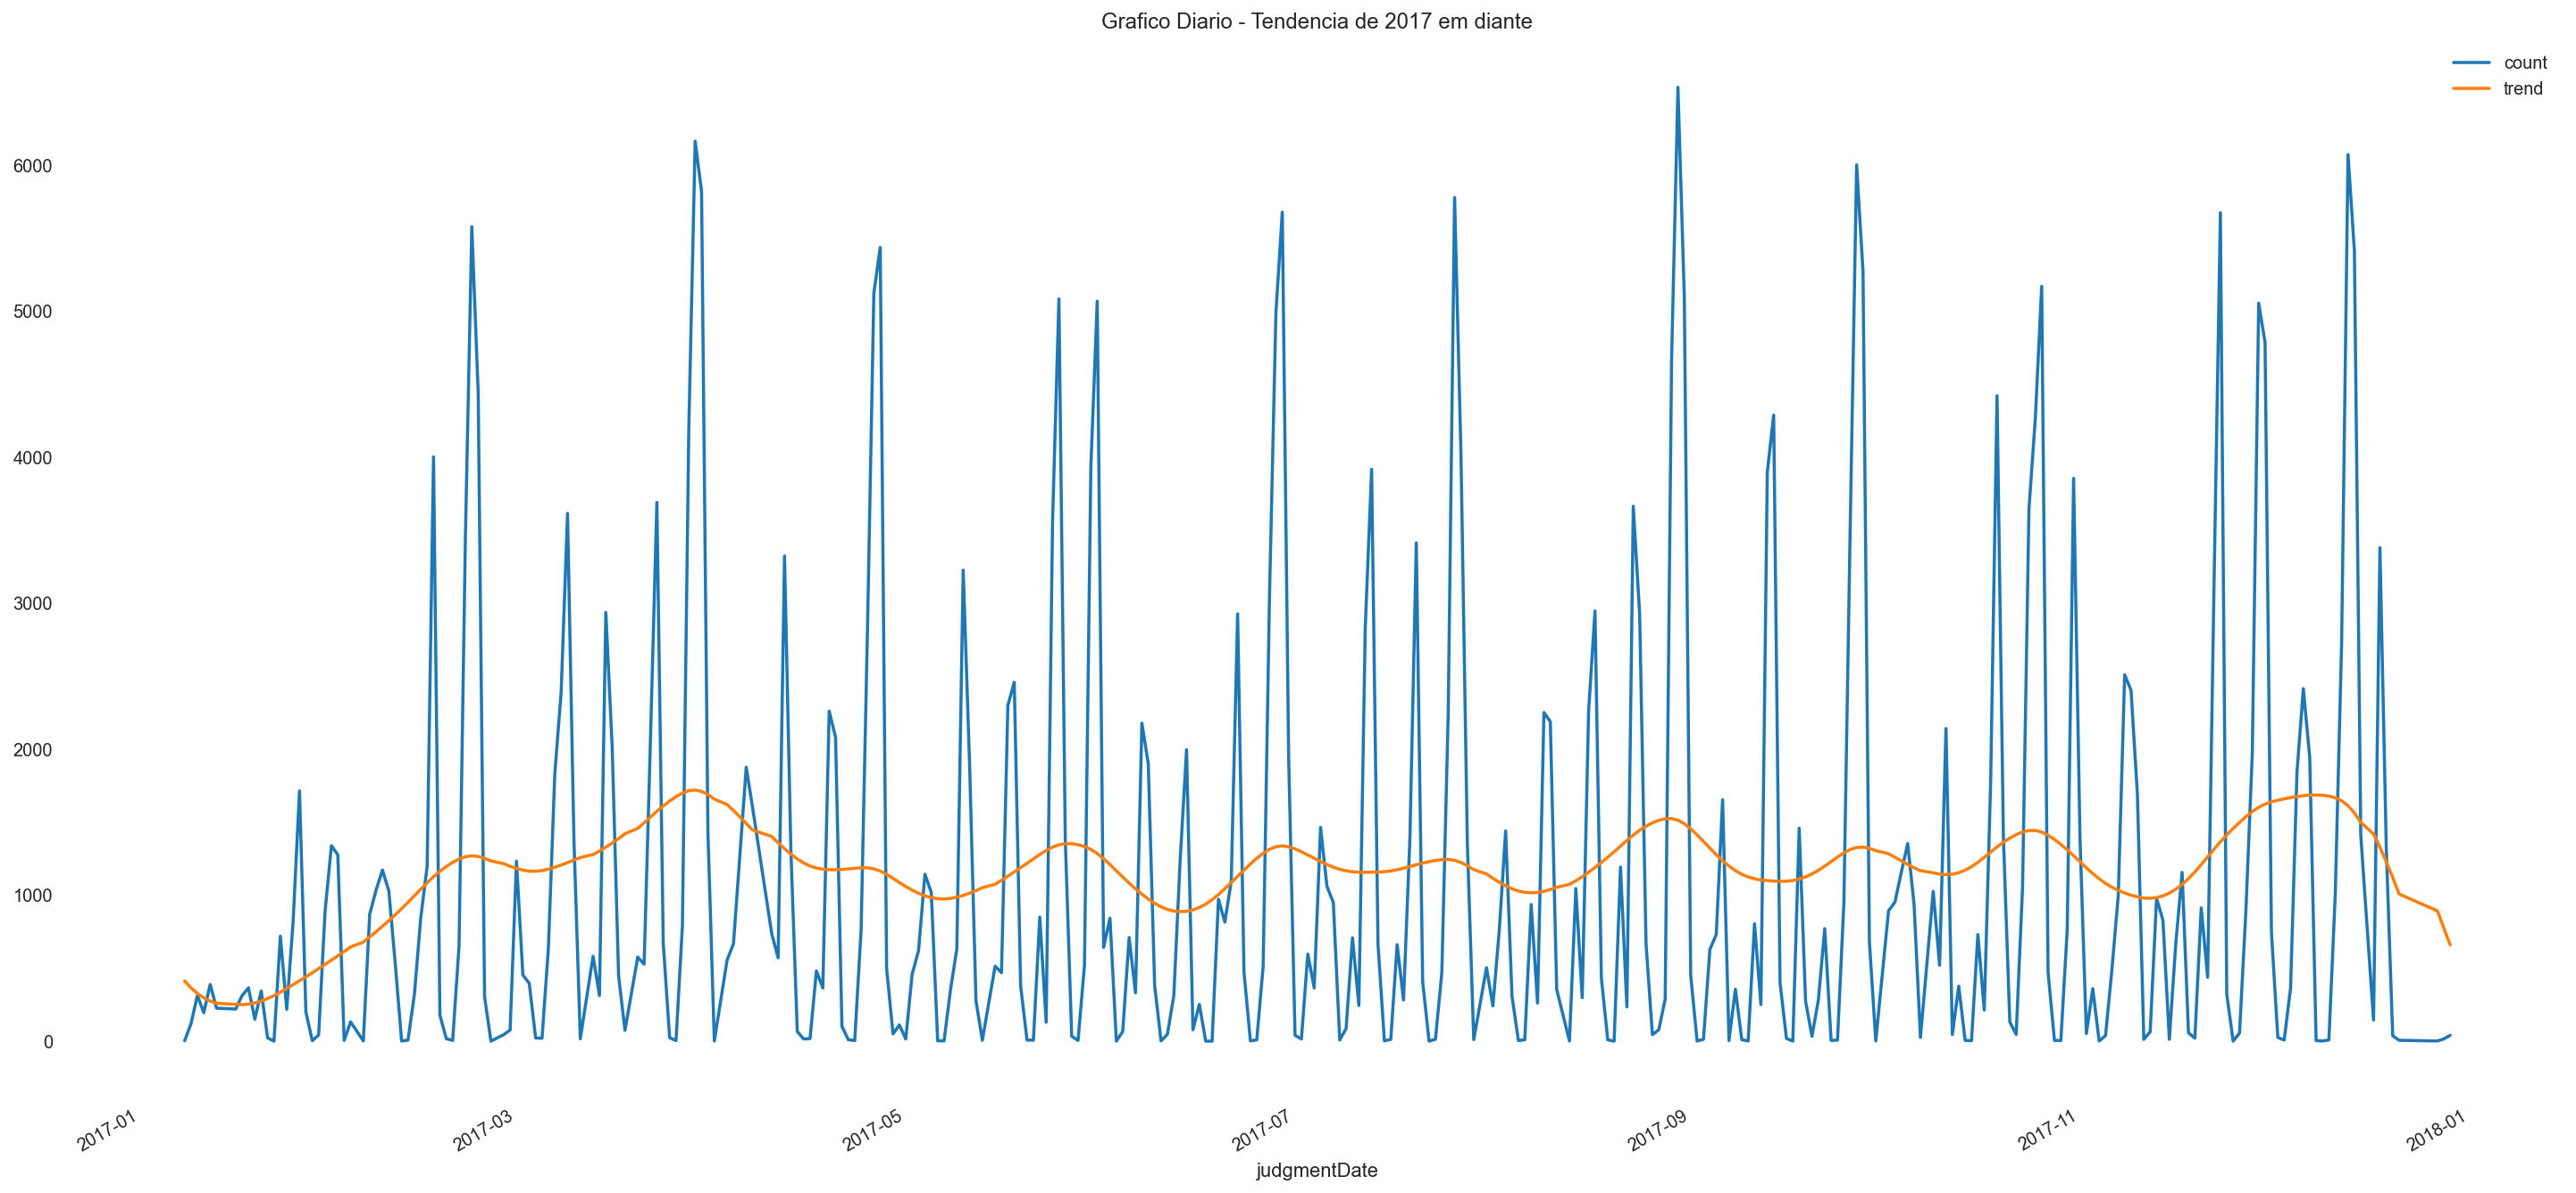

In [207]:
df_t_day[['count','trend']]['2017-01-01':].plot.line(figsize=(25,12),title='Grafico Diario - Tendencia de 2017 em diante')
#df_t_day[['count','trend']].plot.line(figsize=(20,25))

count        trend
yearMonth                     
2000-01-01     12   716.351039
2000-02-01    222   942.719092
2000-03-01    576  1168.646925

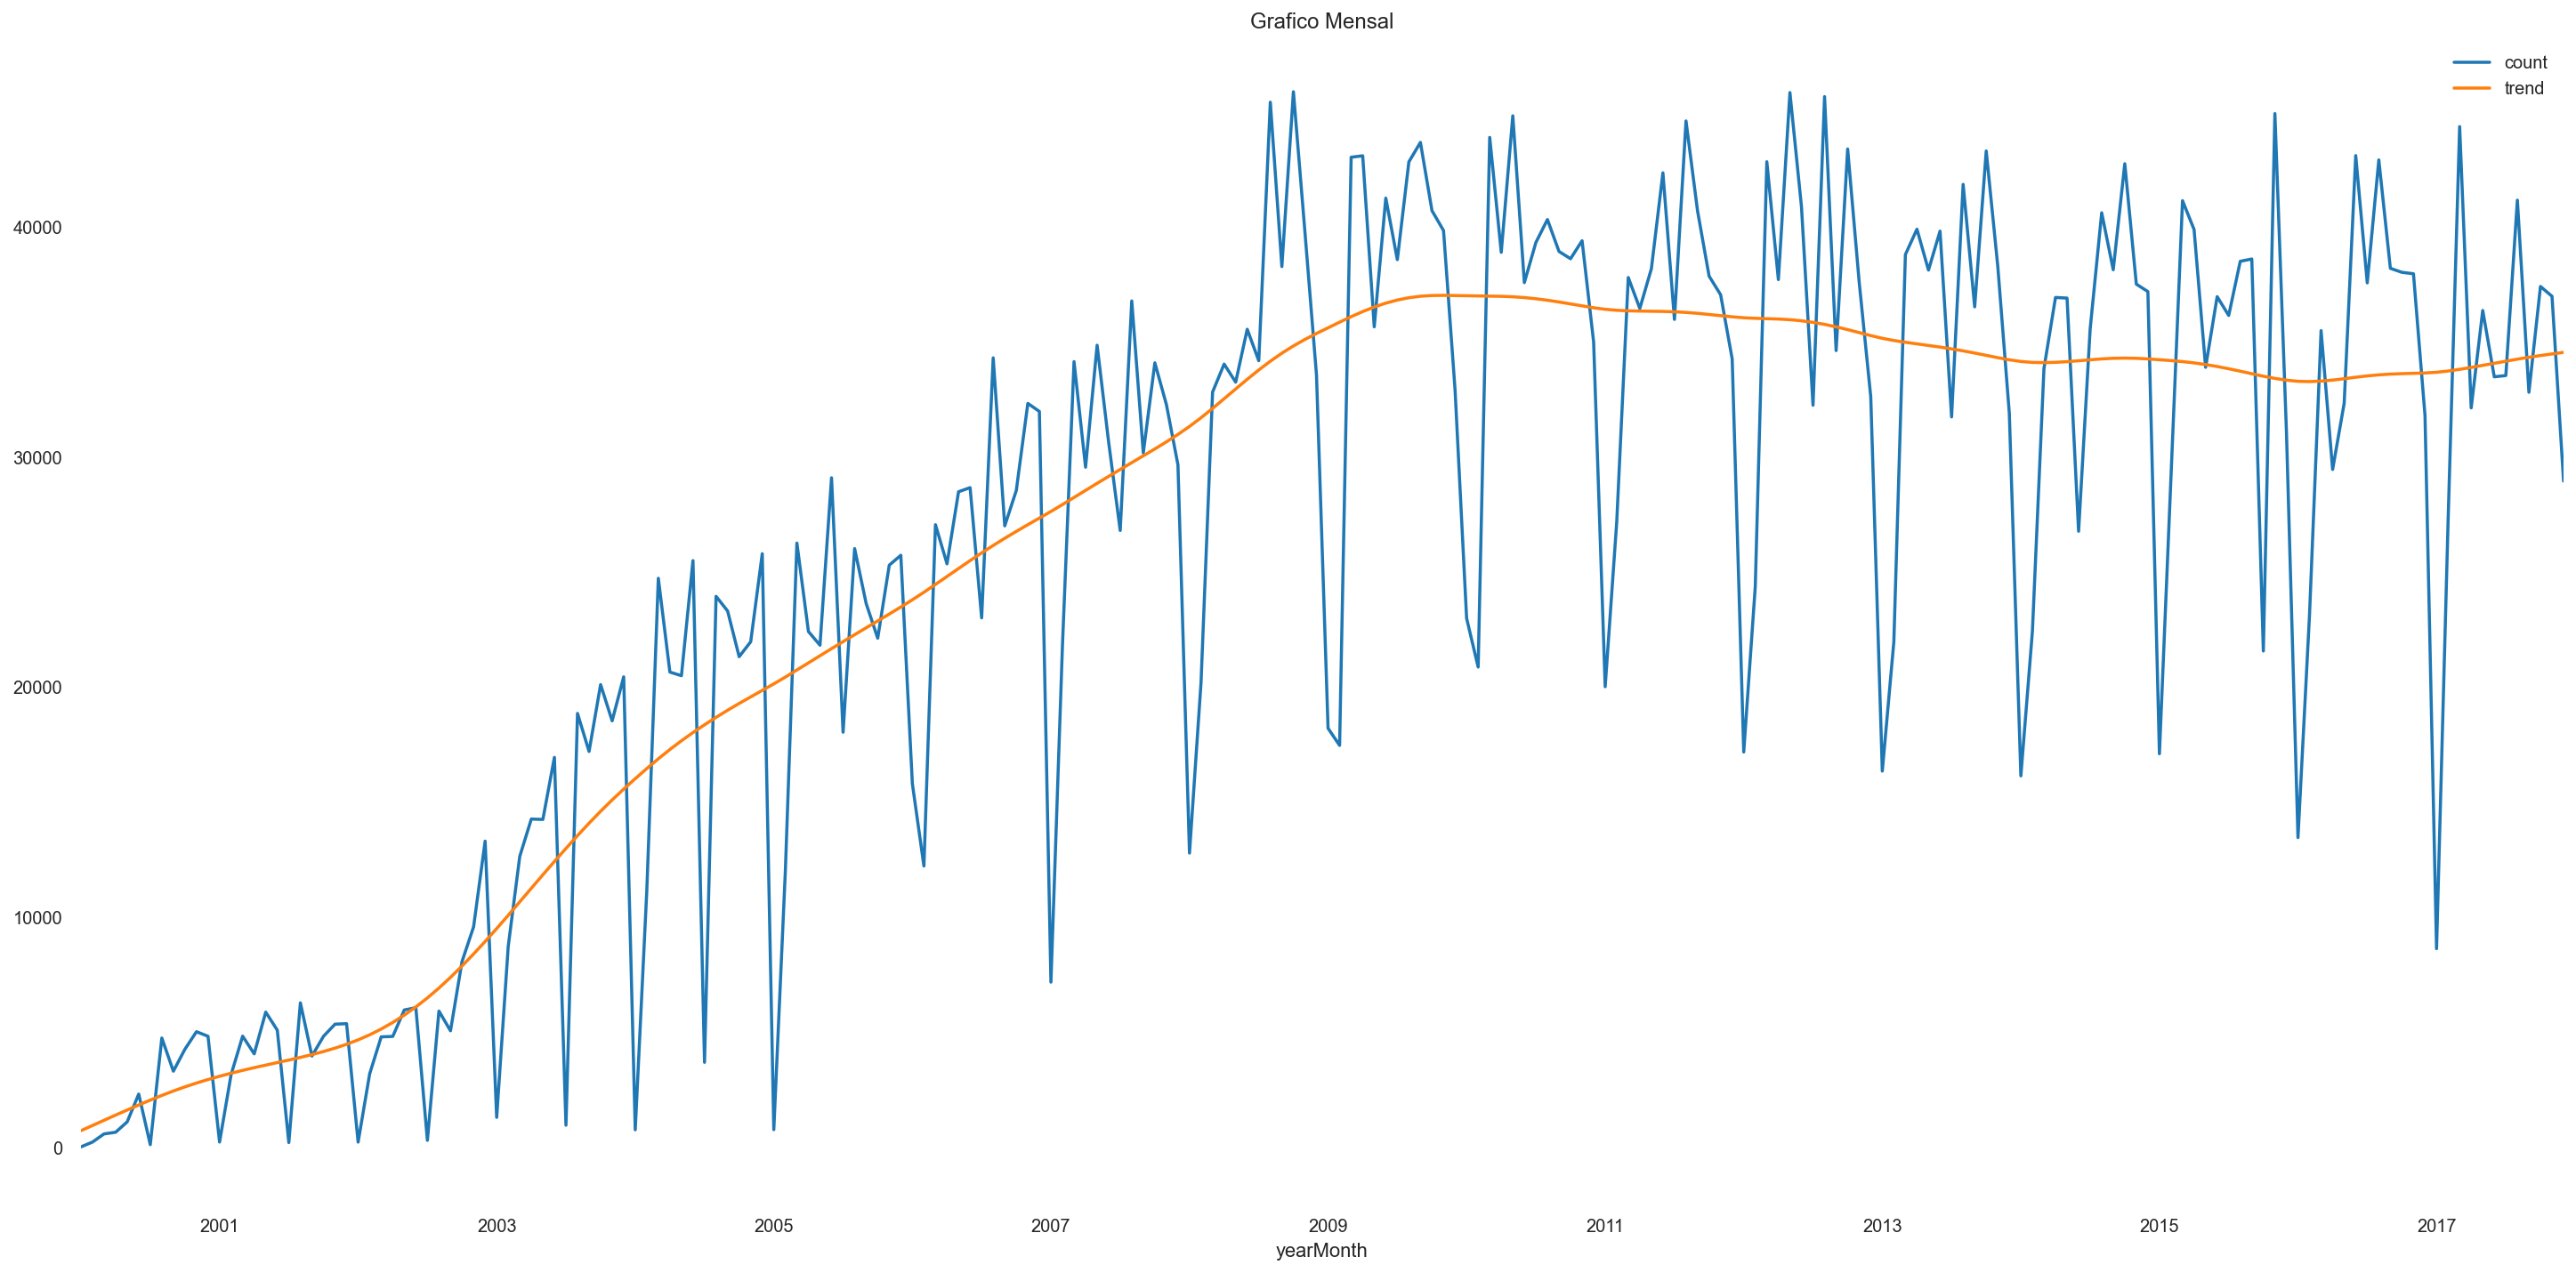

In [208]:
display(df_t_YM.head(3))
#df_t_YM[['count','trend']]['2017-11-01':].plot.line(figsize=(25,10))
df_t_YM[['count','trend']].plot.line(figsize=(25,12),title='Grafico Mensal')


<div class="alert alert-info"><h1> ETS
</h1>
    <hr/>
</div>



In [209]:
#O diario não tem como, pois mesmo que transforme ele pra semanal, continua sem ter alguns valores ... 

#df_t_day_ets = df_t_day
df_t_YM_ets = df_t_YM

In [210]:
#display(df_t_day.head(3))
display(df_t_YM.head(3))
#df_t_day_ets.index = pd.to_datetime(df_t_day_ets.index)
df_t_YM_ets.index = pd.to_datetime(df_t_YM_ets.index)


#df_t_day_ets = df_t_day_ets.asfreq('w')


count        trend
yearMonth                     
2000-01-01     12   716.351039
2000-02-01    222   942.719092
2000-03-01    576  1168.646925

In [211]:
#precisa remover os NaN
#print(df_t_day_ets.isna().sum())
#df_t_day_ets.dropna(inplace=True)
#print(df_t_day_ets.isna().sum())
print(df_t_YM_ets.isna().sum())
print(df_t_YM_ets.isna().count())

count    0
trend    0
dtype: int64
count    216
trend    216
dtype: int64



<div class="alert alert-warning">
    <h2>Utilizar additive ou multiplicative? </h2>
    <h4>Multiplicative quando o crescimento é exponencial</h4>
    <h4>Multiplicative quando o crescimento é linear</h4>
    <hr/>
</div>


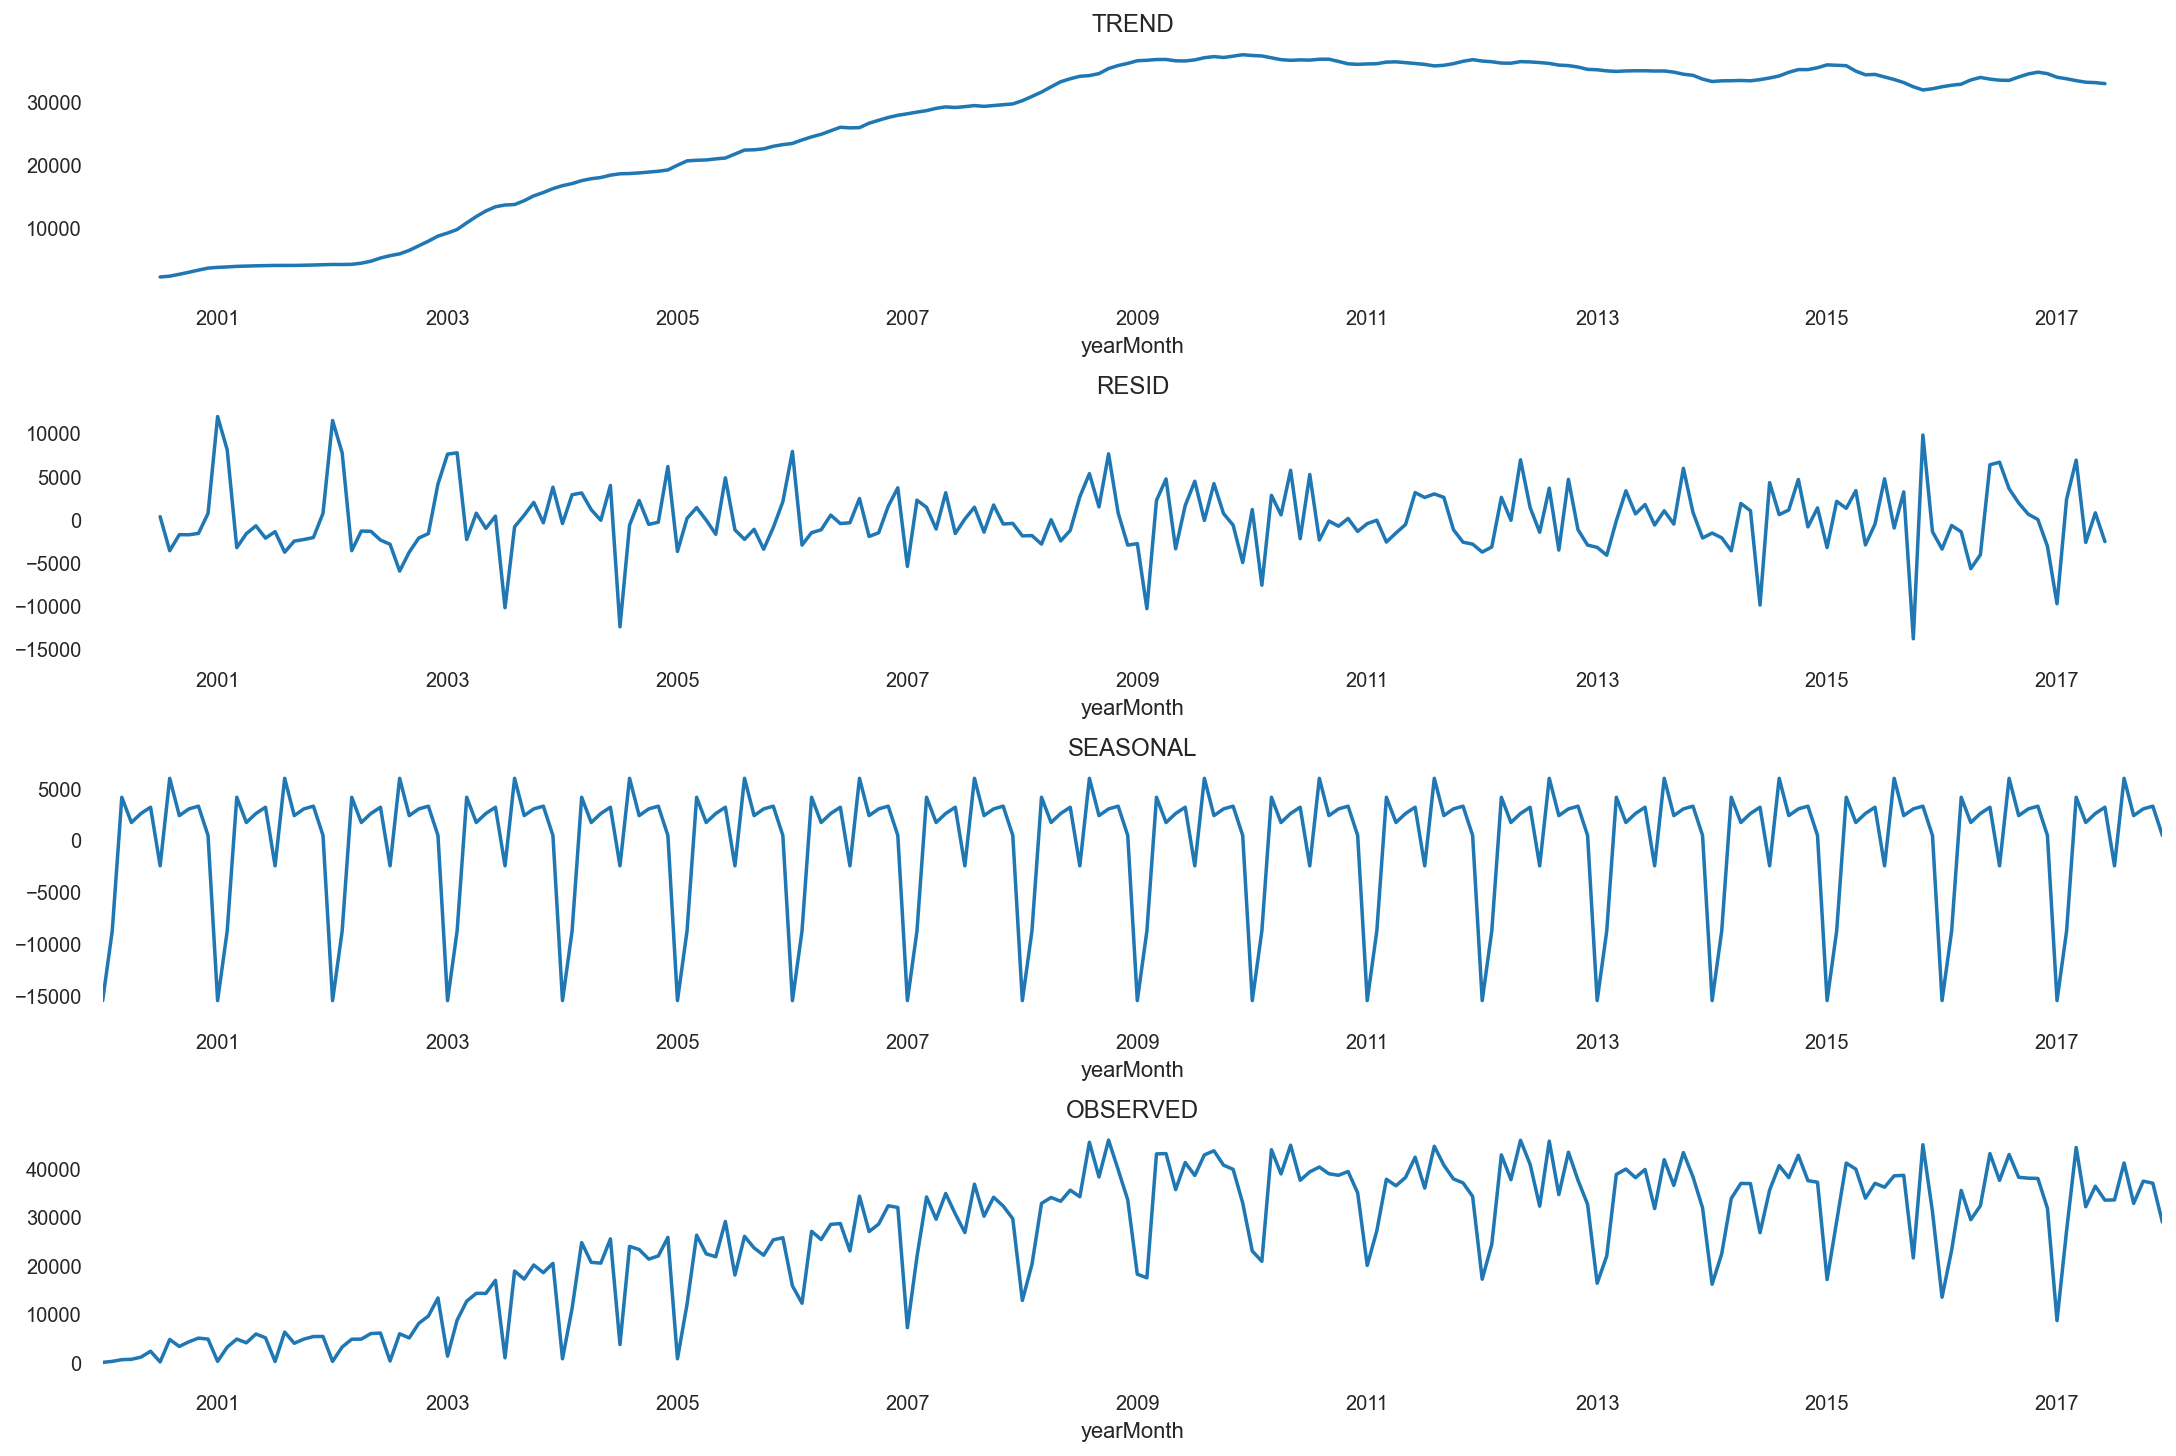

In [212]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt 

#multiplicative usar quando é exponencial
#usar quando é linear 

#result_YM = seasonal_decompose(df_t_YM_ets['count'],model='multiplicative')
result_YM = seasonal_decompose(df_t_YM_ets['count'],model='additive')

fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(15,10), constrained_layout=True)
result_YM.trend.plot(ax=ax1,title='TREND')
result_YM.resid.plot(ax=ax2,title='RESID')
result_YM.seasonal.plot(ax=ax3,title='SEASONAL')
result_YM.observed.plot(ax=ax4,title='OBSERVED');




<div class="alert alert-warning">    
    <h4>Existe algo a ser obsevado nos graficos acima?</h4>    
    <hr/>
</div>






<div class="alert alert-info"><h1> EWMA
</h1>
    <hr/>
</div>


In [281]:
df_ewma_day = df_count_day_type 
df_ewma_week = df_count_week_day_type 
df_ewma_YM = df_count_year_month_type 

display(df_ewma_day.head(1))
display(df_ewma_YM.head(1))
#display(df_ewma_day.dtype)
#display(df_ewma_YM.dtype)

type  count  weekDay   weekType  Dia  Mes  \
judgmentDate                                                               
2000-01-03    Agravo de Instrumento      2        0  DiaSemana    3    1   

               Ano  Feriado  
judgmentDate                 
2000-01-03    2000    False

type  count  6-month-SMA  12-month-SMA
yearMonth                                                          
2000-01-01  Agravo de Instrumento     12          NaN           NaN

In [283]:
df_ewma_day.index = pd.to_datetime(df_ewma_day.index)
df_ewma_YM.index = pd.to_datetime(df_ewma_YM.index)
#display(df_ewma_day.head(1))
#display(df_ewma_YM.head(1))
#display(df_ewma_day.index)
#display(df_ewma_YM.index)

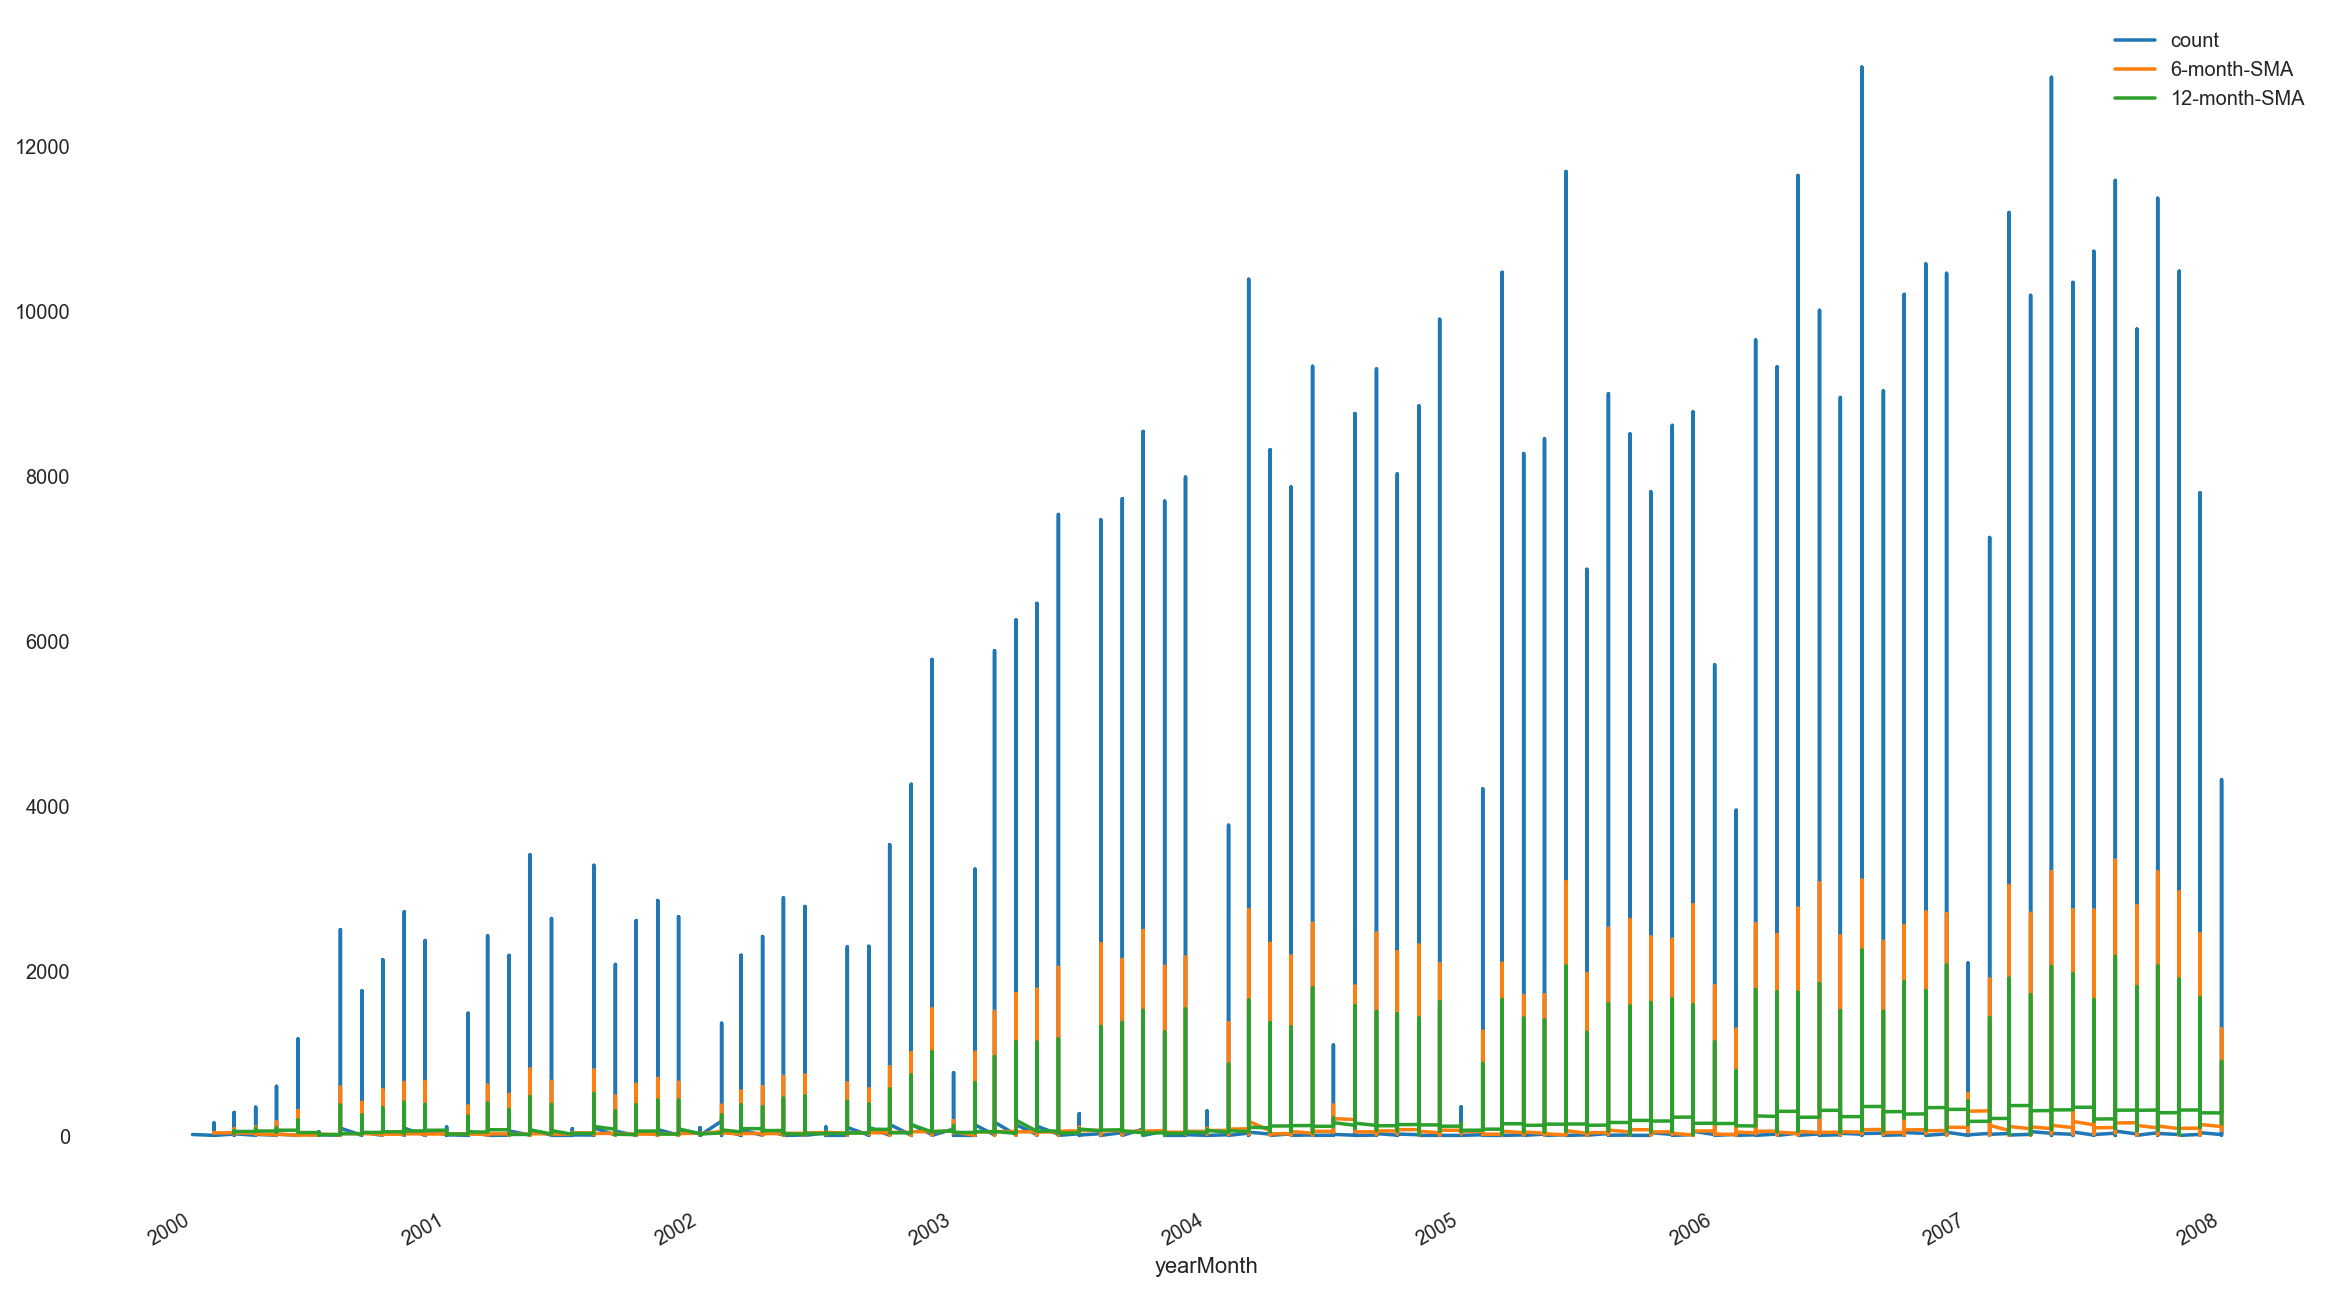

In [301]:
df_ewma_YM_last_8Years = df_ewma_YM['2000-01-01':'2008-01-01']

df_ewma_YM_last_8Years['6-month-SMA'] = df_ewma_YM_last_8Years['count'].rolling(window=6).mean()
df_ewma_YM_last_8Years['12-month-SMA'] = df_ewma_YM_last_8Years['count'].rolling(window=12).mean()
df_ewma_YM_last_8Years.plot.line(figsize=(20,12));


<div class="alert alert-warning">    
    <h4>Grafico acima ficou muito poluido. </h4>        
    <hr/>
    <h4>Abaixo vou somar por meses nos anos de todas as series. </h4>    
</div>


yearMonth  count
yearMonth                                 
2000-01-01  2000-01-01 00:00:00.000     12
2000-02-01  2000-02-01 00:00:00.000    222
2000-03-01  2000-03-01 00:00:00.000    576

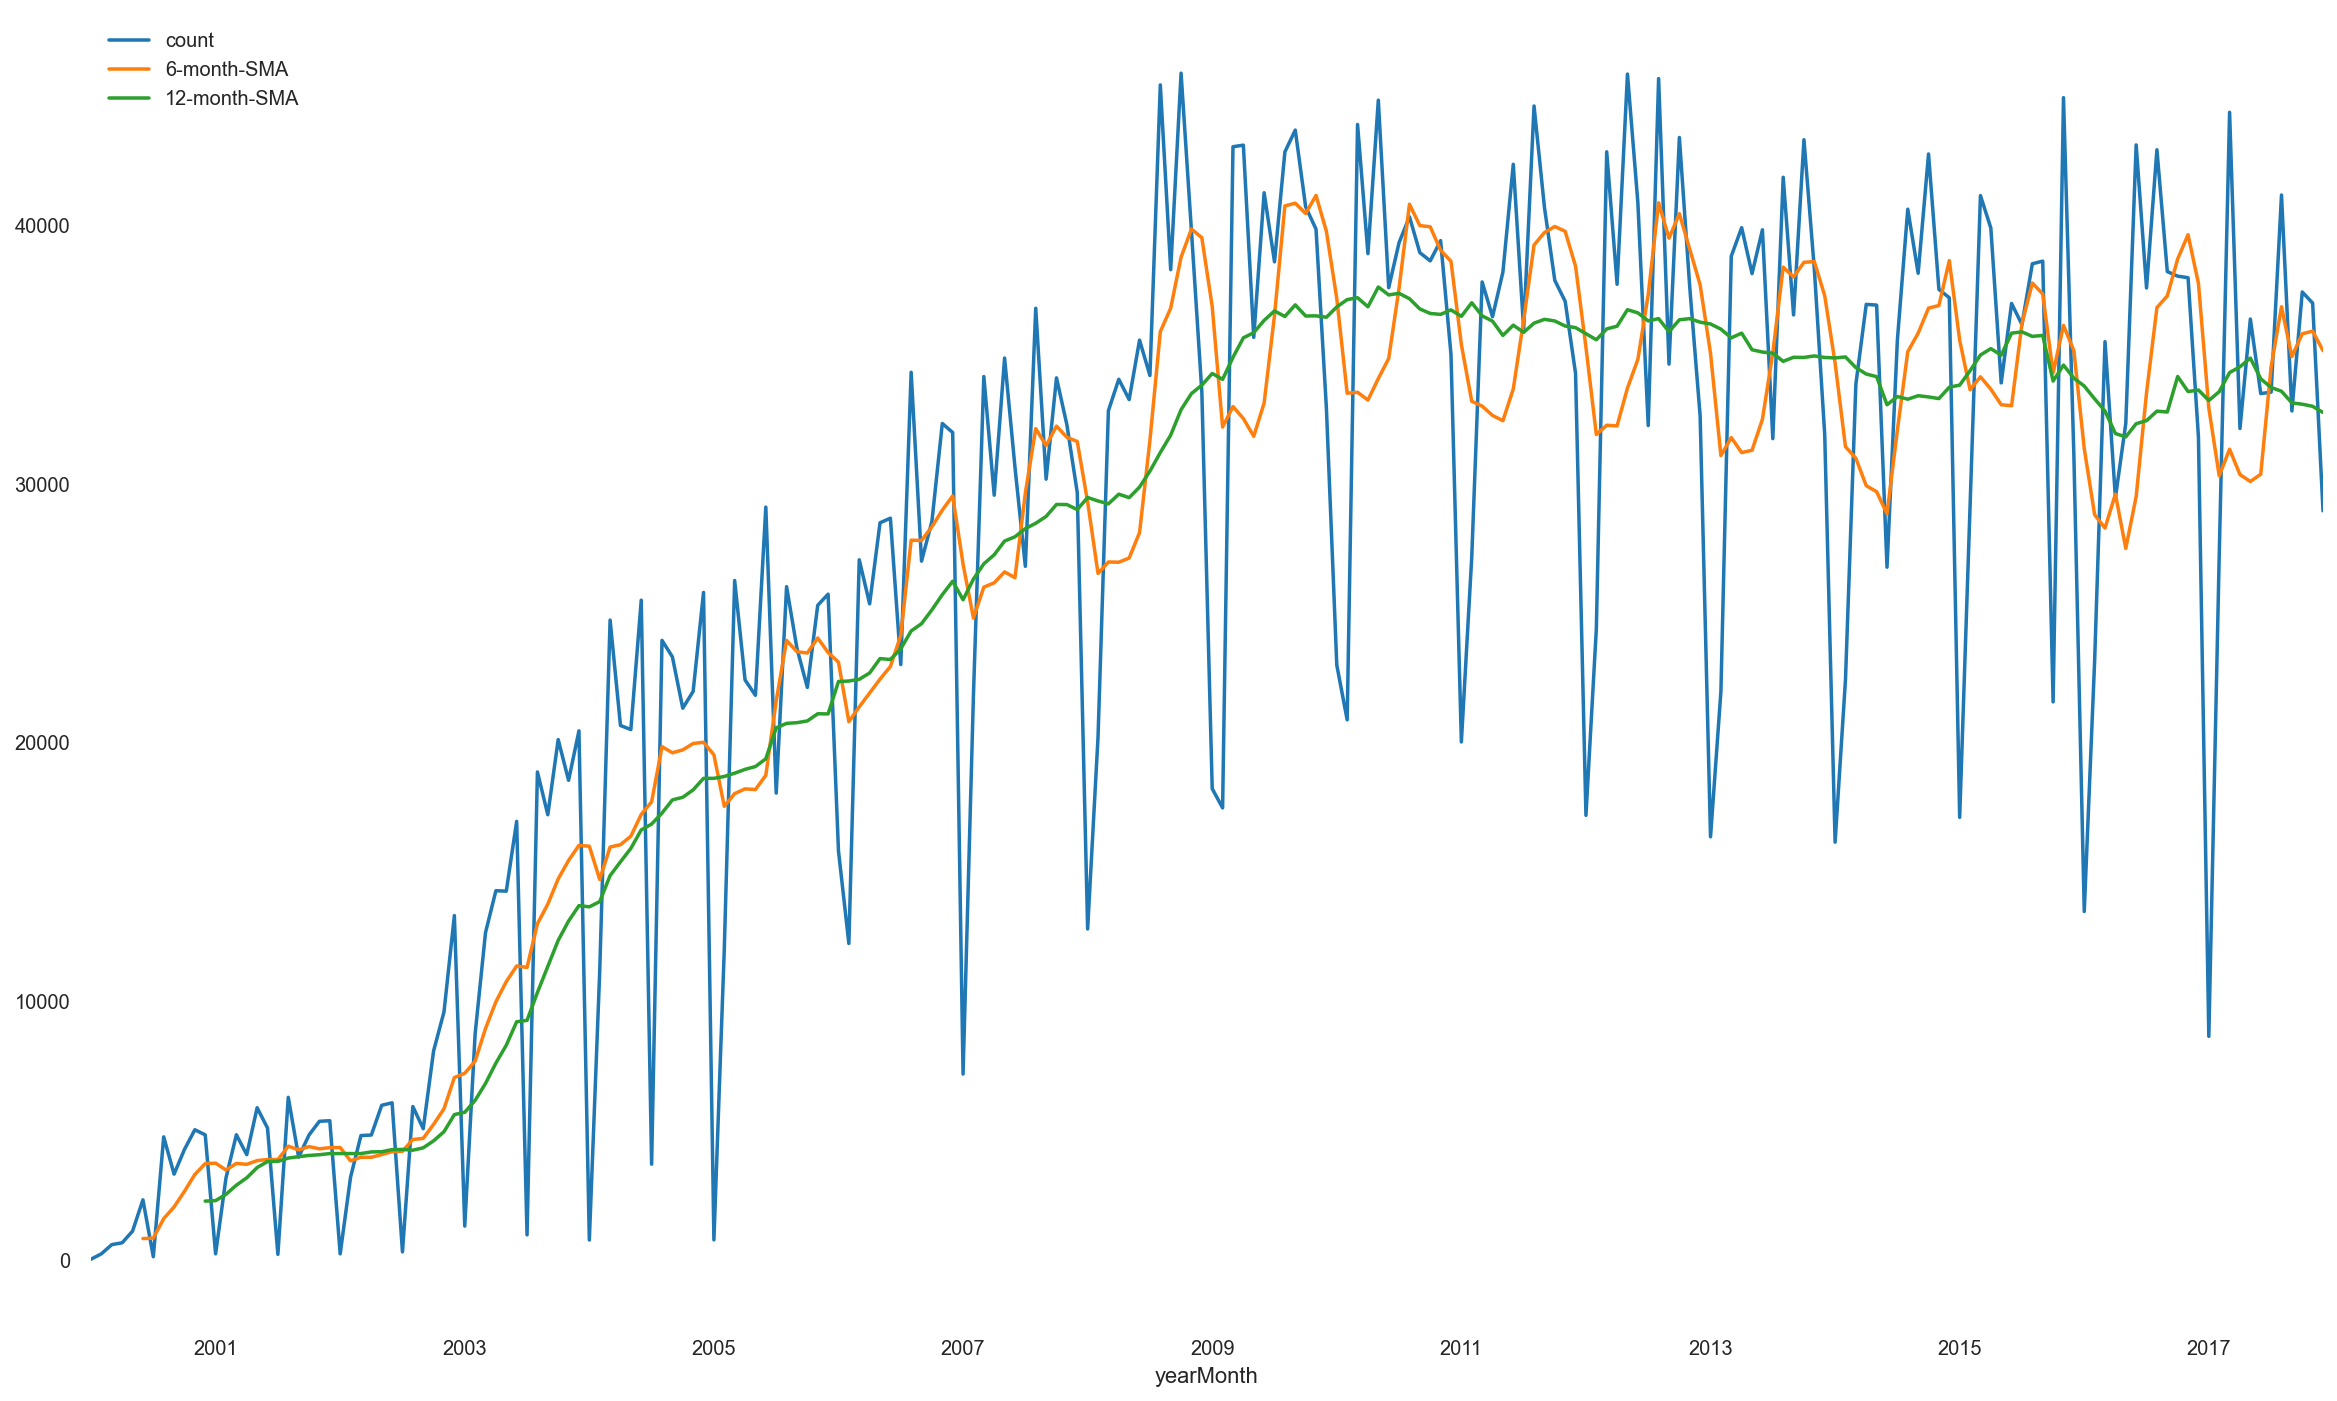

In [323]:
df_ewma_YM_aux =df_ewma_YM.reset_index()
df_ewma_YM_aux['yearMonth'] = pd.to_datetime(df_ewma_YM_aux['yearMonth']).dt.to_period('D')

#df_ewma_YM_aux[['yearMonth','count']].groupby(['yearMonth']).agg({'count':'sum'}).head(3)
df_ewma_year_grp = df_ewma_YM_aux[['yearMonth','count']].groupby(['yearMonth']).agg({'count':'sum'}).reset_index()
df_ewma_year_grp['yearMonth'] = df_ewma_year_grp['yearMonth'].dt.to_timestamp('s').dt.strftime('%Y-%m-%d %H:%M:%S.000')
df_ewma_year_grp.index = pd.to_datetime(df_ewma_year_grp['yearMonth'])
display(df_ewma_year_grp.head(3))

df_ewma_year_grp['6-month-SMA'] = df_ewma_year_grp['count'].rolling(window=6).mean()
df_ewma_year_grp['12-month-SMA'] = df_ewma_year_grp['count'].rolling(window=12).mean()
del df_ewma_year_grp['yearMonth']
df_ewma_year_grp.plot.line(figsize=(20,12));

<div class="alert alert-warning">    
    <h4>Grafico acima a média não alcança os picos ...  </h4>        
    <hr/>    
</div>

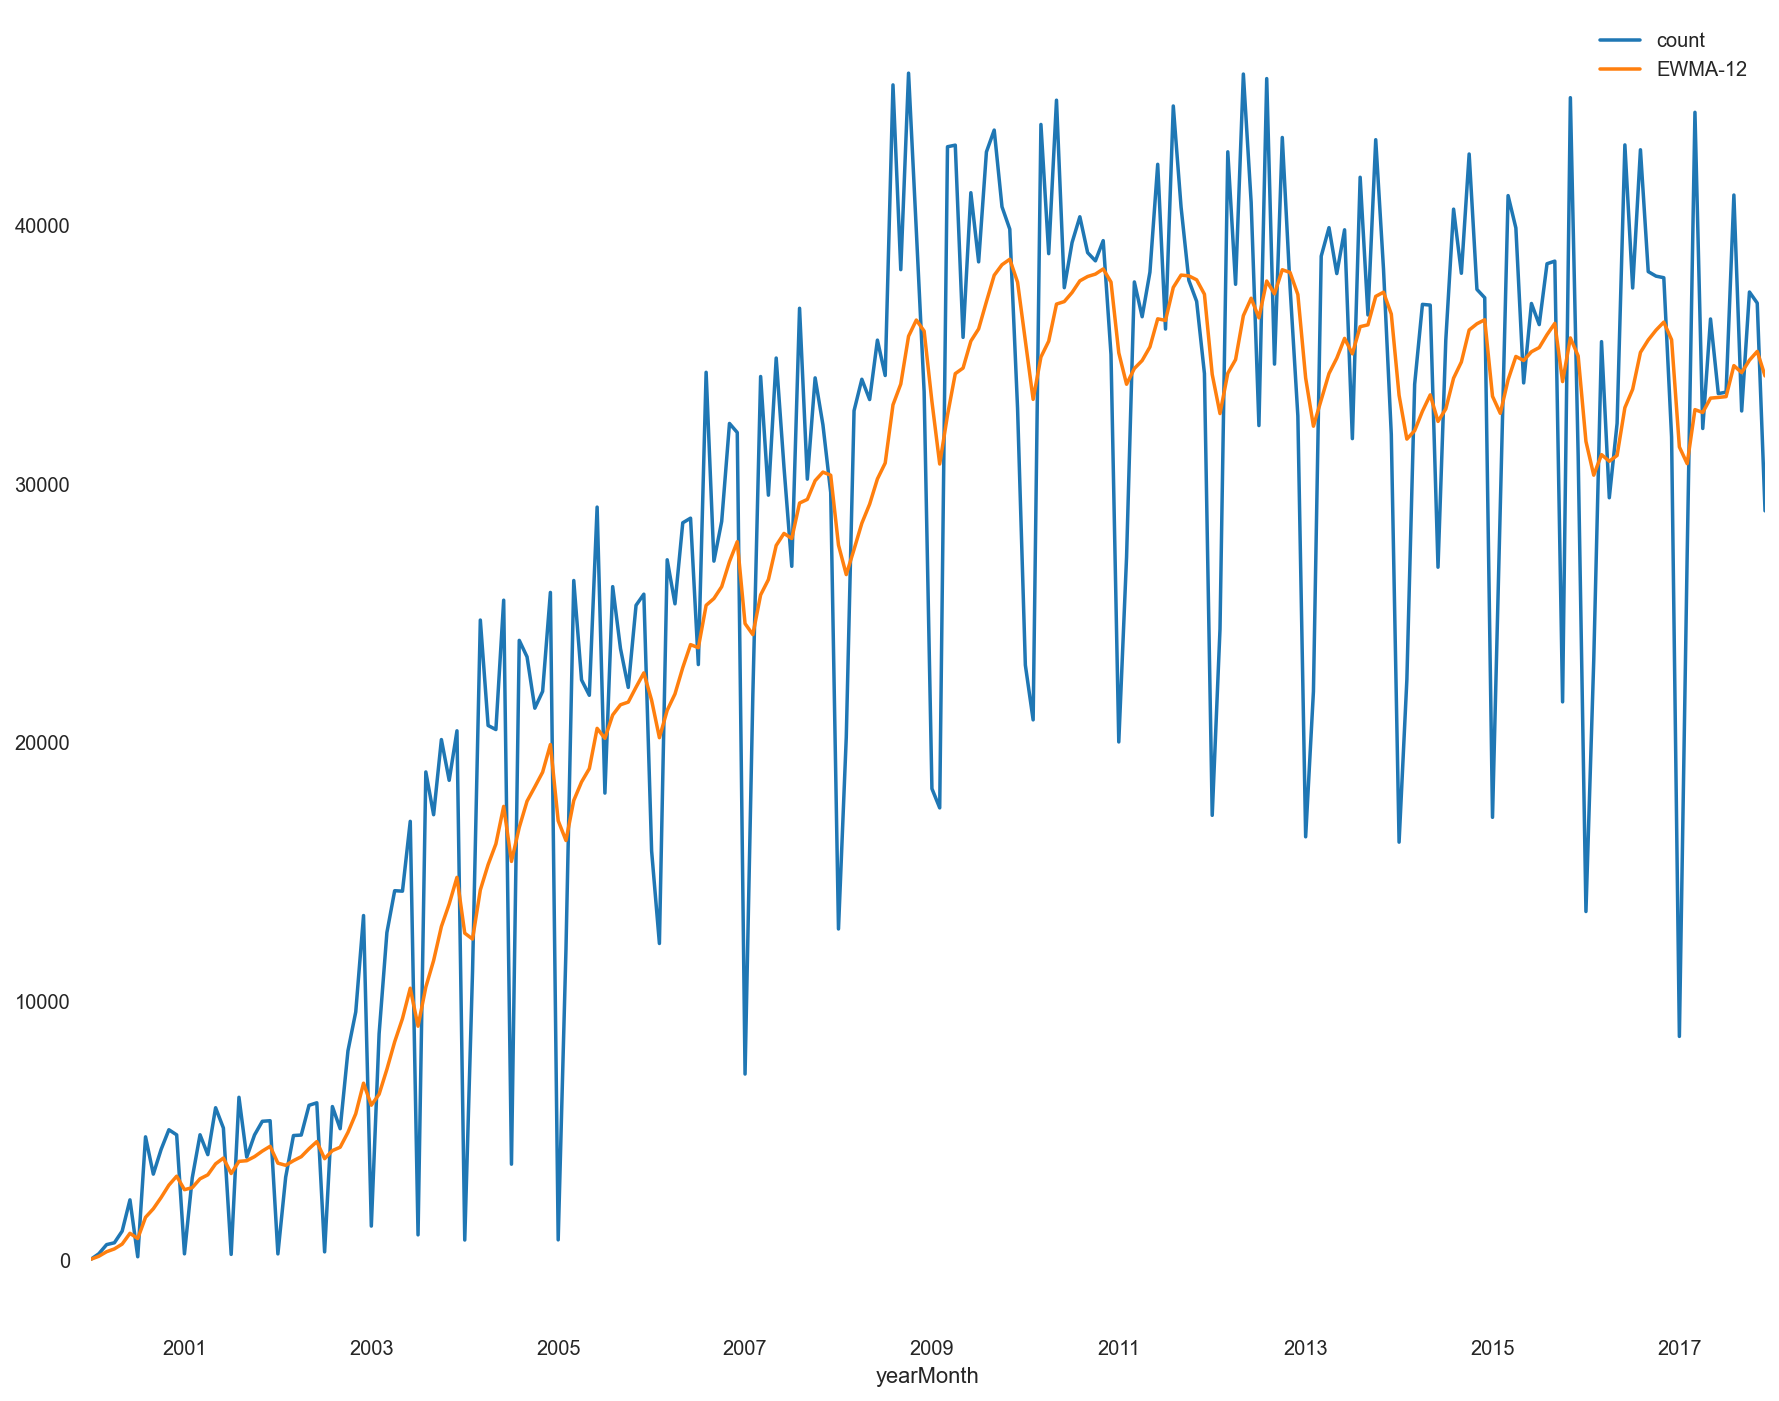

In [345]:
df_ewma_year_grp['EWMA-12'] = df_ewma_year_grp['count'].ewm(span=12).mean()
df_ewma_year_grp[['count','EWMA-12']].plot(figsize=(15,12));


<div class="alert alert-info"><h1> Holt - Winters Methods
</h1>
    <hr/>
</div>

In [426]:
df_Holt_day = df_count_day_type 
df_Holt_week = df_count_week_day_type 
df_Holt_YM = df_count_year_month_type 

display(df_Holt_day.head(1))
display(df_Holt_YM.head(1))

#display(df_Holt_day.index)
#display(df_Holt_YM.index)

df_Holt_YM = df_Holt_YM[df_Holt_YM['type']=='Agravo de Instrumento']


type  count  weekDay   weekType  Dia  Mes  \
judgmentDate                                                               
2000-01-03    Agravo de Instrumento      2        0  DiaSemana    3    1   

               Ano  Feriado  
judgmentDate                 
2000-01-03    2000    False

type  count  6-month-SMA  12-month-SMA  EWMA12  \
yearMonth                                                                     
2000-03-01  Agravo de Instrumento     93    23.166667     28.666667    93.0   

            SES12  DES_add_12  
yearMonth                      
2000-03-01   93.0   93.019446

In [504]:
df_Holt_YM.dropna(inplace=True)
df_Holt_YM.index.asfreq = 'A'

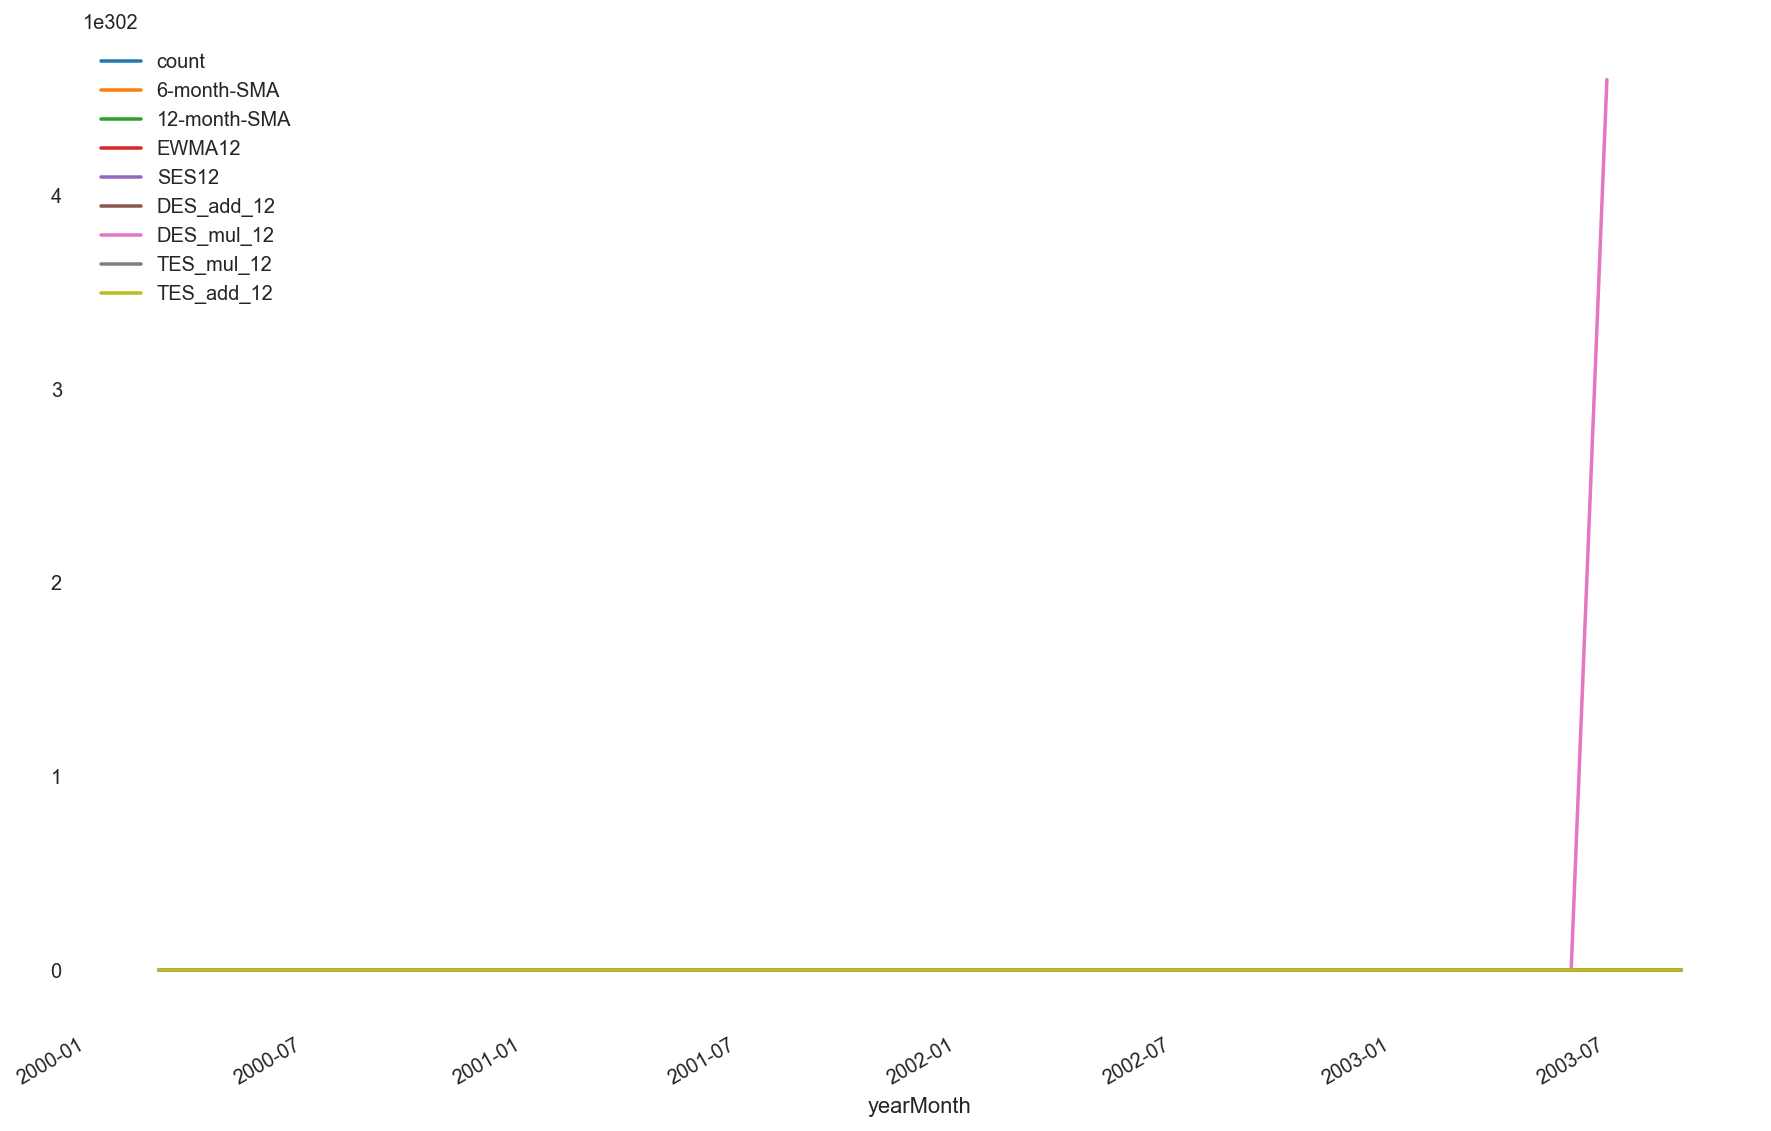

In [505]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
df_Holt_YM.plot(figsize=(15,10))

In [506]:
span = 12 
alpha = 2/(span+1)

In [507]:
df_Holt_YM['EWMA12'] = df_Holt_YM['count'].ewm(alpha=alpha,adjust=False).mean()

In [508]:
df_Holt_YM.head()
model = SimpleExpSmoothing(df_Holt_YM['count'])

In [509]:
fitted_model = model.fit(smoothing_level=alpha, optimized=False)

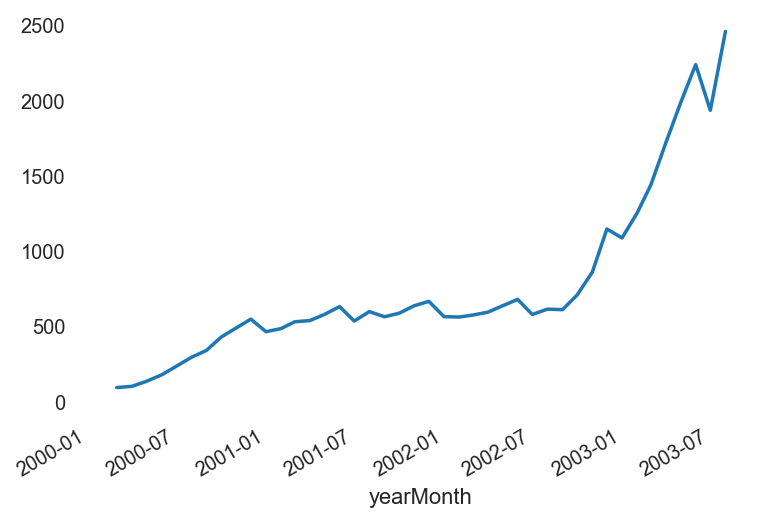

In [510]:
fitted_model.fittedvalues.shift(-1).plot()

In [511]:
df_Holt_YM['SES12']=SimpleExpSmoothing(df_Holt_YM['count']).fit(smoothing_level=alpha, optimized=False).fittedvalues.shift(-1)

In [512]:
df_Holt_YM

type  count  6-month-SMA  12-month-SMA  \
yearMonth                                                             
2000-03-01  Agravo de Instrumento     93    23.166667     28.666667   
2000-04-01  Agravo de Instrumento    145    36.166667     52.583333   
2000-05-01  Agravo de Instrumento    319    58.333333     67.833333   
2000-06-01  Agravo de Instrumento    411    81.666667     52.750000   
2000-08-01  Agravo de Instrumento    934   169.333333     92.750000   
2000-09-01  Agravo de Instrumento    595   137.500000     70.000000   
2000-10-01  Agravo de Instrumento    912   180.833333    120.583333   
2000-11-01  Agravo de Instrumento    824   168.500000     89.500000   
2000-12-01  Agravo de Instrumento    870   186.000000     98.083333   
2001-01-01  Agravo de Instrumento      6    19.000000     63.750000   
2001-02-01  Agravo de Instrumento    598   136.500000     75.333333   
2001-03-01  Agravo de Instrumento    778   175.333333     98.916667   
2001-04-01  Agravo de Instrumento    582   134.500000     68.750000   
2001-05-01  Agravo de Instrumento    804   183.666667     92.666667   
2001-06-01  Agravo de Instrumento    916   202.833333    102.583333   
2001-07-01  Agravo de Instrumento      6    17.500000     15.250000   
2001-08-01  Agravo de Instrumento    944   205.000000    111.500000   
2001-09-01  Agravo de Instrumento    374   120.000000    122.000000   
2001-10-01  Agravo de Instrumento    716   163.500000     83.250000   
2001-11-01  Agravo de Instrumento    910   191.166667    103.250000   
2001-12-01  Agravo de Instrumento    826   185.833333     94.416667   
2002-01-01  Agravo de Instrumento      6    27.166667     20.000000   
2002-02-01  Agravo de Instrumento    547   139.833333     76.000000   
2002-03-01  Agravo de Instrumento    645   167.666667    118.083333   
2002-04-01  Agravo de Instrumento    701   167.333333     99.666667   
2002-05-01  Agravo de Instrumento    868   209.833333    106.833333   
2002-06-01  Agravo de Instrumento    914   208.333333    105.166667   
2002-07-01  Agravo de Instrumento     26    38.333333     21.500000   
2002-08-01  Agravo de Instrumento    809   198.500000    110.333333   
2002-09-01  Agravo de Instrumento    591   157.333333     80.583333   
2002-10-01  Agravo de Instrumento   1246   294.000000    156.000000   
2002-11-01  Agravo de Instrumento   1689   367.166667    184.666667   
2002-12-01  Agravo de Instrumento   2726   585.166667    295.583333   
2003-01-01  Agravo de Instrumento    759   181.500000    116.833333   
2003-02-01  Agravo de Instrumento   2164   442.333333    244.833333   
2003-03-01  Agravo de Instrumento   2462   550.833333    279.333333   
2003-04-01  Agravo de Instrumento   3270   686.000000    353.083333   
2003-05-01  Agravo de Instrumento   3431   707.166667    355.750000   
2003-06-01  Agravo de Instrumento   3638   767.333333    387.583333   
2003-07-01  Agravo de Instrumento    265    80.000000     52.166667   
2003-08-01  Agravo de Instrumento   5337  1034.833333    545.833333   
2003-09-01  Agravo de Instrumento   4098   860.333333    445.000000   

                 EWMA12        SES12   DES_add_12     DES_mul_12   TES_mul_12  \
yearMonth                                                                       
2000-03-01    93.000000    93.000000   231.630528   1.700576e+18   148.956912   
2000-04-01   101.000000   101.000000   235.098197   6.844965e+25   243.738065   
2000-05-01   134.538462   134.538462   288.851816   2.653040e+33   448.032523   
2000-06-01   177.071006   177.071006   353.883387   9.901786e+40   552.618788   
2000-08-01   293.521620   293.521620   553.959014   3.558612e+48  1103.198114   
2000-09-01   339.902910   339.902910   595.073992   1.231530e+56   772.262635   
2000-10-01   427.917847   427.917847   717.540935   4.103993e+63  1097.599453   
2000-11-01   488.853562   488.853562   777.946157   1.316939e+71  1015.901267   
2000-12-01   547.491476   547.491476   834.103619   4.069321e+78  1065.928734   
2001-01-01   

In [513]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

df_Holt_YM['DES_add_12'] = ExponentialSmoothing(df_Holt_YM['count'],trend='add').fit().fittedvalues.shift(-1)
df_Holt_YM['DES_mul_12'] = ExponentialSmoothing(df_Holt_YM['count'],trend='mul').fit().fittedvalues.shift(-1)
df_Holt_YM.head()

type  count  6-month-SMA  12-month-SMA  \
yearMonth                                                             
2000-03-01  Agravo de Instrumento     93    23.166667     28.666667   
2000-04-01  Agravo de Instrumento    145    36.166667     52.583333   
2000-05-01  Agravo de Instrumento    319    58.333333     67.833333   
2000-06-01  Agravo de Instrumento    411    81.666667     52.750000   
2000-08-01  Agravo de Instrumento    934   169.333333     92.750000   

                EWMA12       SES12  DES_add_12  DES_mul_12   TES_mul_12  \
yearMonth                                                                 
2000-03-01   93.000000   93.000000  234.487552  543.562702   148.956912   
2000-04-01  101.000000  101.000000  269.465281  452.691141   243.738065   
2000-05-01  134.538462  134.538462  337.649225  403.551623   448.032523   
2000-06-01  177.071006  177.071006  414.700997  378.653060   552.618788   
2000-08-01  293.521620  293.521620  615.934444  452.461916  1103.198114   

             TES_add_12  
yearMonth                
2000-03-01   149.874757  
2000-04-01   245.286408  
2000-05-01   449.946101  
2000-06-01   554.548738  
2000-08-01  1105.410621

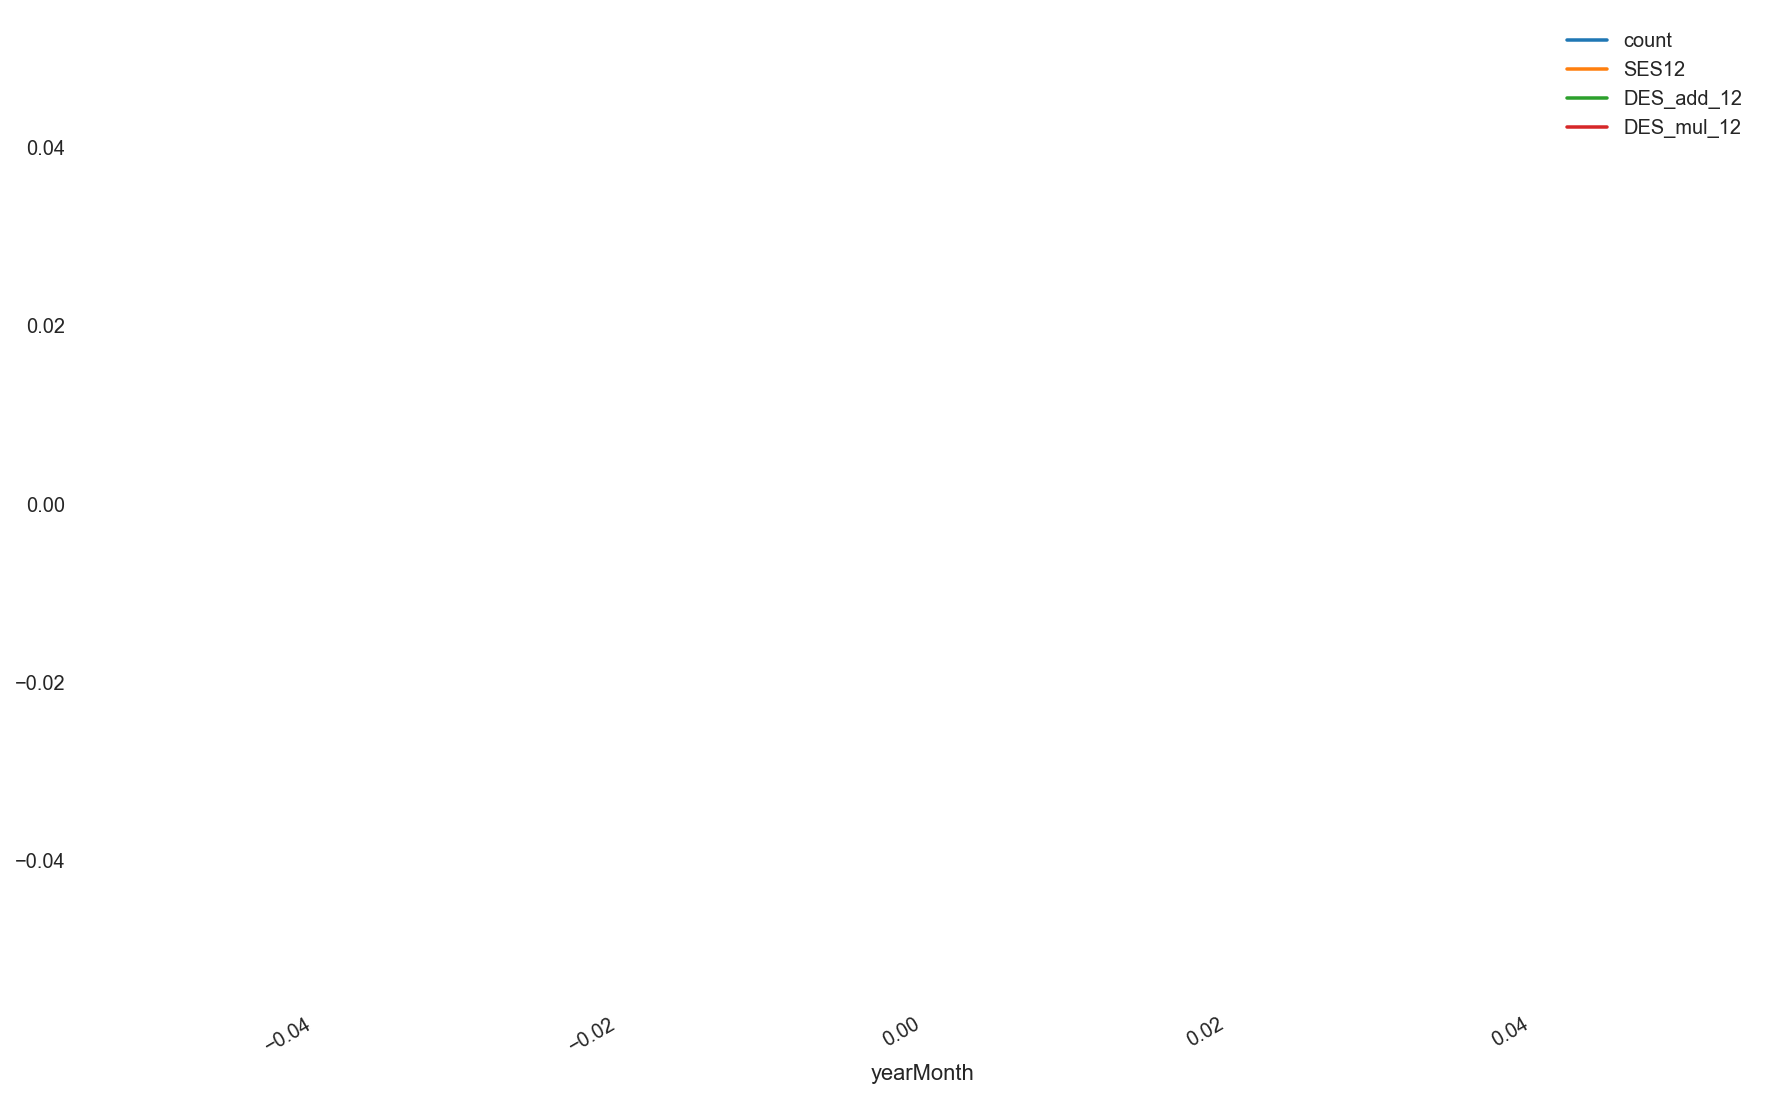

In [514]:
df_Holt_YM[['type', 'count', #'6-month-SMA', '12-month-SMA', 'EWMA12'
             'SES12','DES_add_12','DES_mul_12']].iloc[200:].plot(figsize=(15,10));

In [515]:
df_Holt_YM['TES_add_12'] = ExponentialSmoothing(df_Holt_YM['count'],trend='add',seasonal='add',seasonal_periods=12).fit().fittedvalues


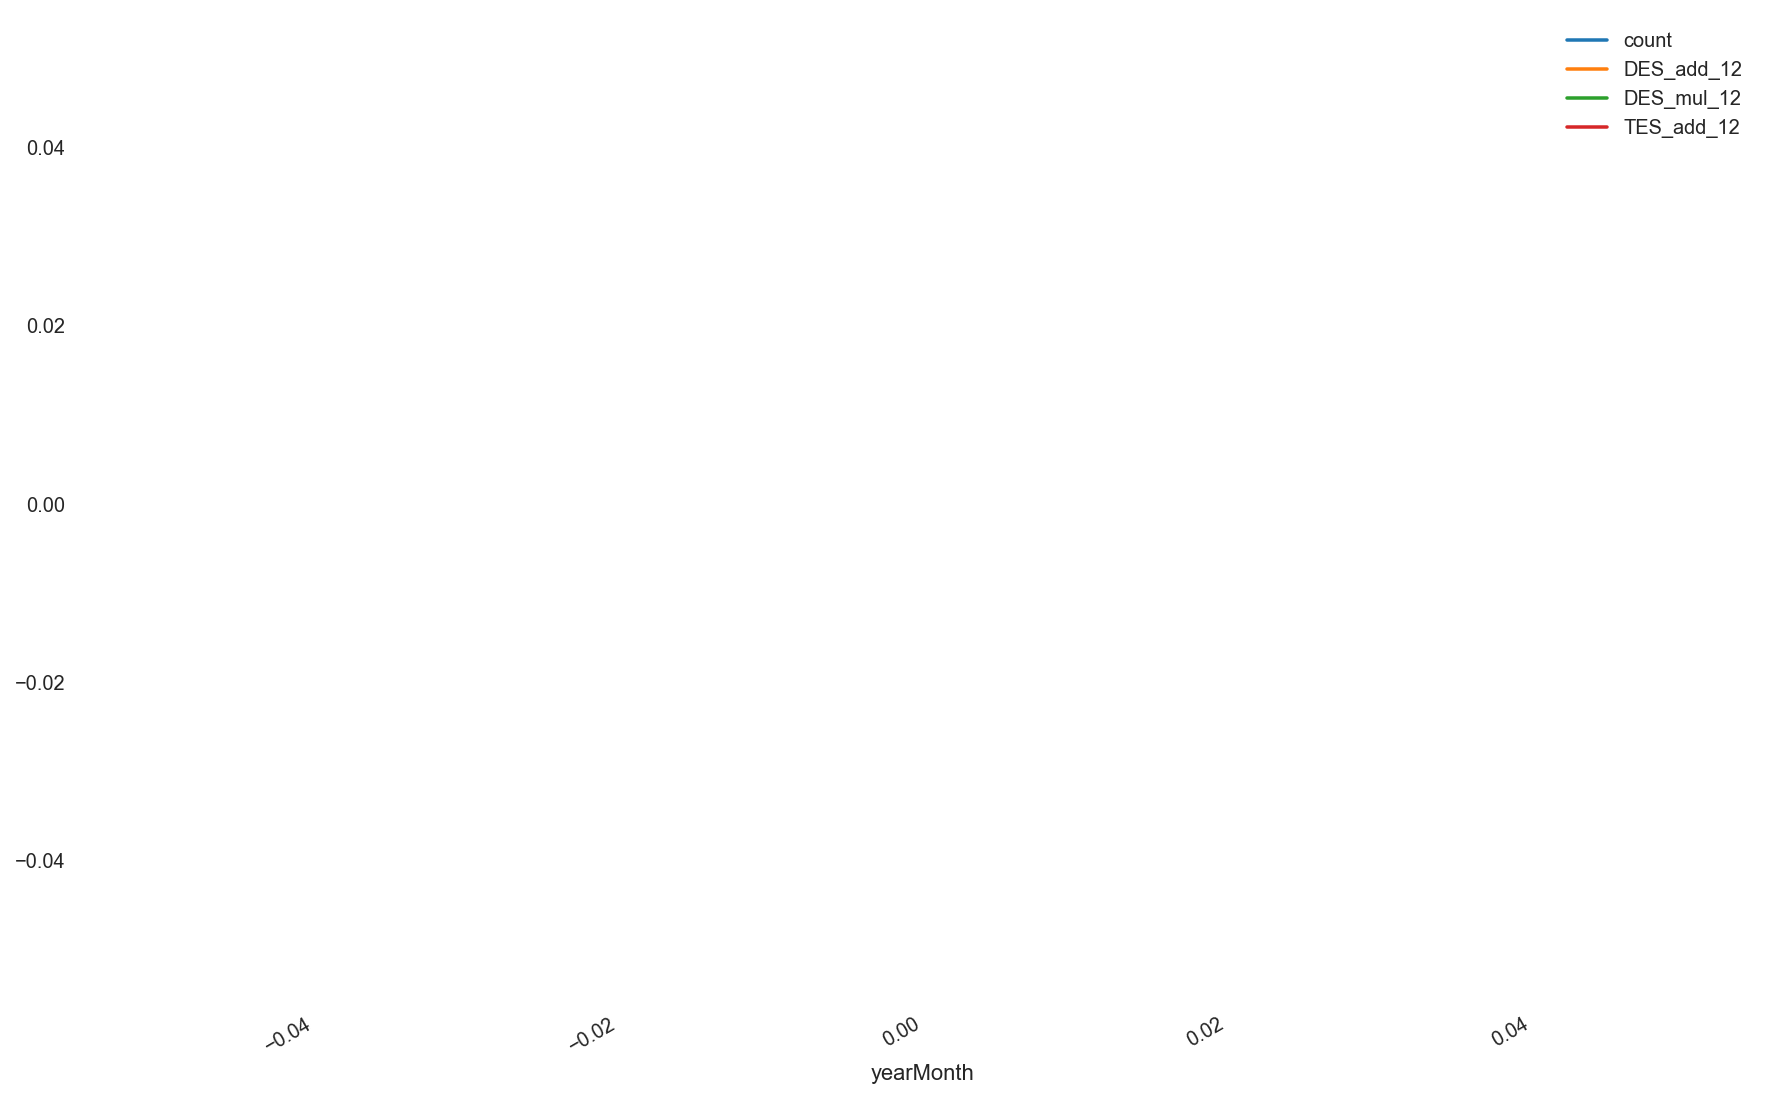

In [516]:
df_Holt_YM[['type', 'count', #'6-month-SMA', '12-month-SMA', 'EWMA12'
            # 'SES12',
            'DES_add_12',
            'DES_mul_12','TES_add_12']].iloc[160:].plot(figsize=(15,10));

In [517]:
df_Holt_YM

type  count  6-month-SMA  12-month-SMA  \
yearMonth                                                             
2000-03-01  Agravo de Instrumento     93    23.166667     28.666667   
2000-04-01  Agravo de Instrumento    145    36.166667     52.583333   
2000-05-01  Agravo de Instrumento    319    58.333333     67.833333   
2000-06-01  Agravo de Instrumento    411    81.666667     52.750000   
2000-08-01  Agravo de Instrumento    934   169.333333     92.750000   
2000-09-01  Agravo de Instrumento    595   137.500000     70.000000   
2000-10-01  Agravo de Instrumento    912   180.833333    120.583333   
2000-11-01  Agravo de Instrumento    824   168.500000     89.500000   
2000-12-01  Agravo de Instrumento    870   186.000000     98.083333   
2001-01-01  Agravo de Instrumento      6    19.000000     63.750000   
2001-02-01  Agravo de Instrumento    598   136.500000     75.333333   
2001-03-01  Agravo de Instrumento    778   175.333333     98.916667   
2001-04-01  Agravo de Instrumento    582   134.500000     68.750000   
2001-05-01  Agravo de Instrumento    804   183.666667     92.666667   
2001-06-01  Agravo de Instrumento    916   202.833333    102.583333   
2001-07-01  Agravo de Instrumento      6    17.500000     15.250000   
2001-08-01  Agravo de Instrumento    944   205.000000    111.500000   
2001-09-01  Agravo de Instrumento    374   120.000000    122.000000   
2001-10-01  Agravo de Instrumento    716   163.500000     83.250000   
2001-11-01  Agravo de Instrumento    910   191.166667    103.250000   
2001-12-01  Agravo de Instrumento    826   185.833333     94.416667   
2002-01-01  Agravo de Instrumento      6    27.166667     20.000000   
2002-02-01  Agravo de Instrumento    547   139.833333     76.000000   
2002-03-01  Agravo de Instrumento    645   167.666667    118.083333   
2002-04-01  Agravo de Instrumento    701   167.333333     99.666667   
2002-05-01  Agravo de Instrumento    868   209.833333    106.833333   
2002-06-01  Agravo de Instrumento    914   208.333333    105.166667   
2002-07-01  Agravo de Instrumento     26    38.333333     21.500000   
2002-08-01  Agravo de Instrumento    809   198.500000    110.333333   
2002-09-01  Agravo de Instrumento    591   157.333333     80.583333   
2002-10-01  Agravo de Instrumento   1246   294.000000    156.000000   
2002-11-01  Agravo de Instrumento   1689   367.166667    184.666667   
2002-12-01  Agravo de Instrumento   2726   585.166667    295.583333   
2003-01-01  Agravo de Instrumento    759   181.500000    116.833333   
2003-02-01  Agravo de Instrumento   2164   442.333333    244.833333   
2003-03-01  Agravo de Instrumento   2462   550.833333    279.333333   
2003-04-01  Agravo de Instrumento   3270   686.000000    353.083333   
2003-05-01  Agravo de Instrumento   3431   707.166667    355.750000   
2003-06-01  Agravo de Instrumento   3638   767.333333    387.583333   
2003-07-01  Agravo de Instrumento    265    80.000000     52.166667   
2003-08-01  Agravo de Instrumento   5337  1034.833333    545.833333   
2003-09-01  Agravo de Instrumento   4098   860.333333    445.000000   

                 EWMA12        SES12   DES_add_12   DES_mul_12   TES_mul_12  \
yearMonth                                                                     
2000-03-01    93.000000    93.000000   234.487552   543.562702   148.956912   
2000-04-01   101.000000   101.000000   269.465281   452.691141   243.738065   
2000-05-01   134.538462   134.538462   337.649225   403.551623   448.032523   
2000-06-01   177.071006   177.071006   414.700997   378.653060   552.618788   
2000-08-01   293.521620   293.521620   615.934444   452.461916  1103.198114   
2000-09-01   339.902910   339.902910   696.538682   464.342988   772.262635   
2000-10-01   427.917847   427.917847   840.039396   535.758457  1097.599453   
2000-11-01   488.853562   488.853562   931.501655   589.841447  1015.901267   
2000-12-01   547.491476   547.491476  1009.884562   651.062328  1065.928734   
2001-01-01   464.185095   464.18509